In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
for dirname, _, filenames in os.walk('./Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Data/201802-fordgobike-tripdata.csv
./Data/201909-baywheels-tripdata.csv
./Data/201811-fordgobike-tripdata.csv
./Data/201904-fordgobike-tripdata.csv
./Data/201809-fordgobike-tripdata.csv
./Data/201806-fordgobike-tripdata.csv
./Data/201907-baywheels-tripdata.csv
./Data/201903-fordgobike-tripdata.csv
./Data/201906-baywheels-tripdata.csv
./Data/201805-fordgobike-tripdata.csv
./Data/201908-baywheels-tripdata.csv
./Data/201812-fordgobike-tripdata.csv
./Data/201801-fordgobike-tripdata.csv
./Data/201905-baywheels-tripdata.csv
./Data/202004-baywheels-tripdata.csv.old
./Data/201901-fordgobike-tripdata.csv
./Data/201807-fordgobike-tripdata.csv
./Data/202001-baywheels-tripdata.csv
./Data/201808-fordgobike-tripdata.csv
./Data/201910-baywheels-tripdata.csv
./Data/201810-fordgobike-tripdata.csv
./Data/202002-baywheels-tripdata.csv
./Data/202005-baywheels-tripdata.csv
./Data/201803-fordgobike-tripdata.csv
./Data/202004-baywheels-tripdata.csv
./Data/202003-baywheels-tripdata.csv
./Data/201912-baywhe

In [3]:
nRowsRead = None # specify 'None' if want to read whole file
# 2017-fordgobike-tripdata.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./Data/201901-fordgobike-tripdata.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '2019-fordgobike-tripdata.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 192082 rows and 14 columns


In [4]:
df1.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [5]:
import glob

path = r'./Data'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one

/Users/hwkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  import sys
/Users/hwkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  import sys
/Users/hwkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  import sys


In [6]:
concatenated_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity
0,598.0,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN
1,943.0,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN
2,18587.0,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN
3,18558.0,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN
4,885.0,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN


In [7]:
concatenated_df['month'] = pd.DatetimeIndex(concatenated_df['start_time']).month

In [8]:
concatenated_df['month']

0          2
1          2
2          2
3          2
4          2
          ..
5498216    2
5498217    2
5498218    2
5498219    2
5498220    2
Name: month, Length: 5498221, dtype: int64

In [9]:
concatenated_df['year'] = pd.DatetimeIndex(concatenated_df['start_time']).year

In [10]:
concatenated_df['year']

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
5498216    2019
5498217    2019
5498218    2019
5498219    2019
5498220    2019
Name: year, Length: 5498221, dtype: int64

In [11]:
concatenated_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year
0,598.0,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,2,2018
1,943.0,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673.0,Customer,No,NaN,NaN,NaN,NaN,2,2018
2,18587.0,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498.0,Customer,No,NaN,NaN,NaN,NaN,2,2018
3,18558.0,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129.0,Customer,No,NaN,NaN,NaN,NaN,2,2018
4,885.0,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,2,2018


In [12]:
concatenated_df["date"] = (concatenated_df["year"].astype(str) + "." + concatenated_df["month"].astype(str))


In [13]:
concatenated_df["date"]

0          2018.2
1          2018.2
2          2018.2
3          2018.2
4          2018.2
            ...  
5498216    2019.2
5498217    2019.2
5498218    2019.2
5498219    2019.2
5498220    2019.2
Name: date, Length: 5498221, dtype: object

In [14]:
concatenated_df["date"].value_counts().sort_index()

2018.1      94802
2018.10    201458
2018.11    134135
2018.12    131363
2018.2     106718
2018.3     111382
2018.4     131169
2018.5     179125
2018.6     195968
2018.7     199222
2018.8     192162
2018.9     186217
2019.1     192082
2019.10    239895
2019.11    185496
2019.12    150102
2019.2     183412
2019.3     256299
2019.4     239111
2019.5     182163
2019.6     191772
2019.7     258102
2019.8     210563
2019.9     217986
2020.1     295854
2020.2     424789
2020.3     182632
2020.4      85991
2020.5     138251
Name: date, dtype: int64

In [15]:
type(concatenated_df["start_station_longitude"][0])

numpy.float64

In [16]:
sfdf = concatenated_df[concatenated_df['start_station_longitude'].between(-122.5143, -122.3484, inclusive=True)]

In [17]:
notsfdf = concatenated_df[concatenated_df['start_station_longitude'].between(-122.3484, -120.5280, inclusive=False)]

In [18]:
concatenated_df['date'].value_counts().sort_index(ascending=True)

2018.1      94802
2018.10    201458
2018.11    134135
2018.12    131363
2018.2     106718
2018.3     111382
2018.4     131169
2018.5     179125
2018.6     195968
2018.7     199222
2018.8     192162
2018.9     186217
2019.1     192082
2019.10    239895
2019.11    185496
2019.12    150102
2019.2     183412
2019.3     256299
2019.4     239111
2019.5     182163
2019.6     191772
2019.7     258102
2019.8     210563
2019.9     217986
2020.1     295854
2020.2     424789
2020.3     182632
2020.4      85991
2020.5     138251
Name: date, dtype: int64

In [19]:
concatenated_df['year'].value_counts()

2019    2506983
2018    1863721
2020    1127517
Name: year, dtype: int64

In [20]:
sfdf['year'].value_counts()

2019    1852943
2018    1362601
2020     924247
Name: year, dtype: int64

In [21]:
notsfdf['year'].value_counts()

2019    654017
2018    501109
2020    203246
Name: year, dtype: int64

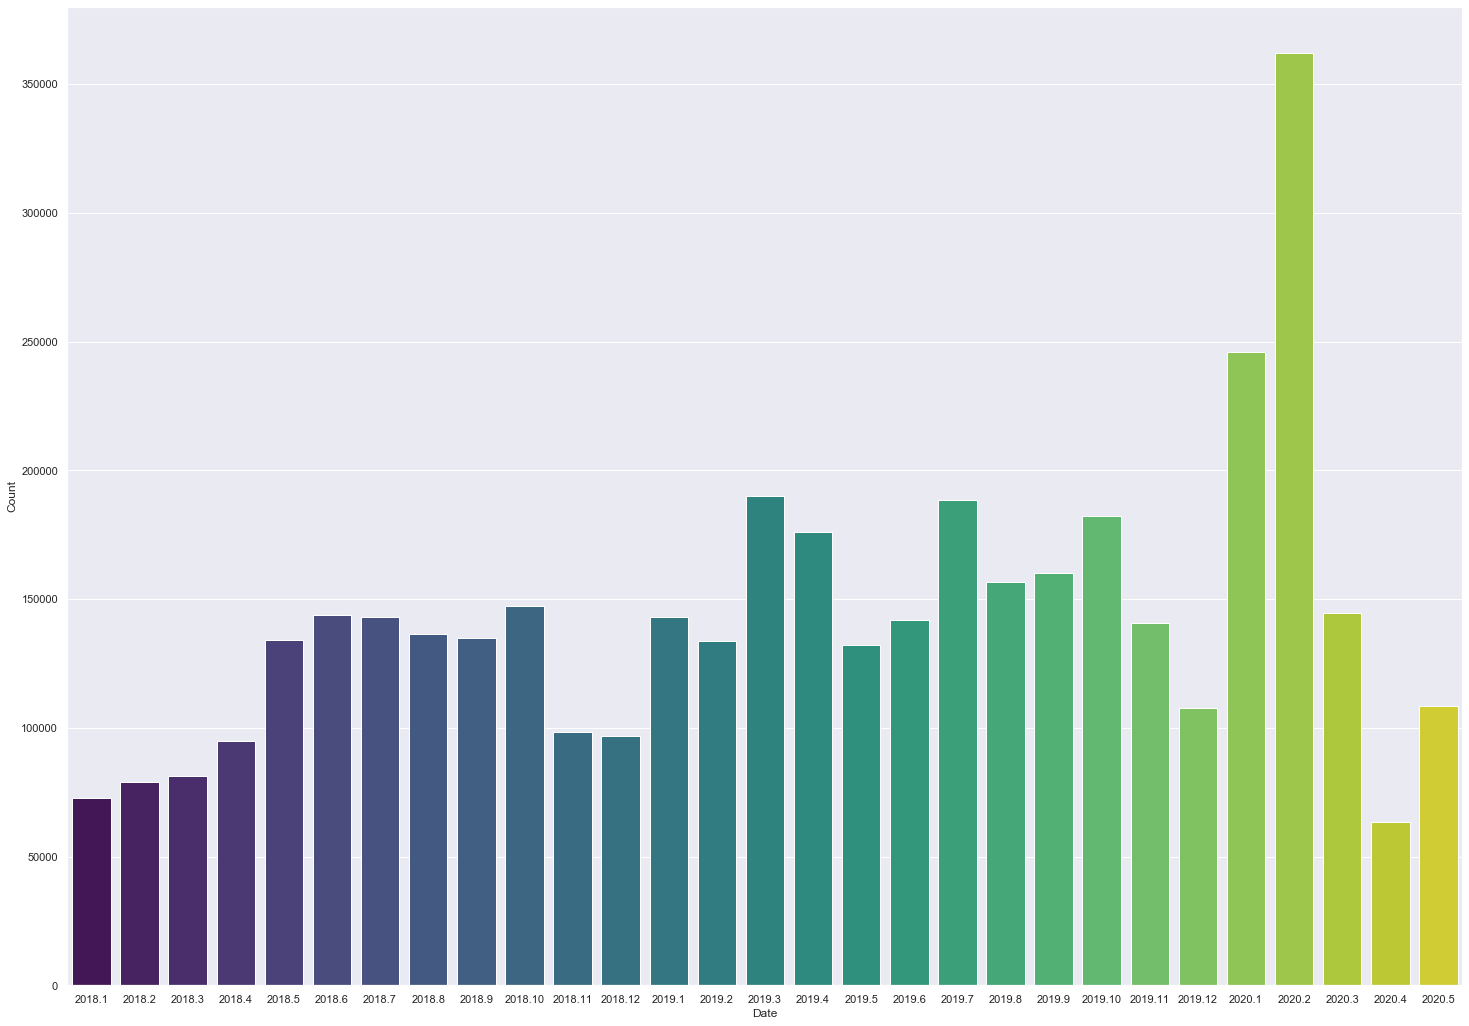

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,18)})

pl1 = sns.countplot(x='date', palette='viridis', data=sfdf, order=['2018.1','2018.2','2018.3','2018.4','2018.5','2018.6','2018.7','2018.8','2018.9','2018.10','2018.11','2018.12', '2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7','2019.8','2019.9','2019.10','2019.11','2019.12','2020.1','2020.2','2020.3','2020.4','2020.5'])


pl1.set(xlabel='Date', ylabel='Count')
plt.show()

In [23]:
concatenated_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date
0,598.0,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,2,2018,2018.2
1,943.0,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,1673.0,Customer,No,NaN,NaN,NaN,NaN,2,2018,2018.2
2,18587.0,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3498.0,Customer,No,NaN,NaN,NaN,NaN,2,2018,2018.2
3,18558.0,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3129.0,Customer,No,NaN,NaN,NaN,NaN,2,2018,2018.2
4,885.0,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,...,1839.0,Subscriber,Yes,NaN,NaN,NaN,NaN,2,2018,2018.2


In [24]:
dateRange = ['2018.1','2018.2','2018.3','2018.4','2018.5','2018.6','2018.7','2018.8','2018.9','2018.10','2018.11','2018.12', '2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7','2019.8','2019.9','2019.10','2019.11','2019.12','2020.1','2020.2','2020.3','2020.4','2020.5']

In [25]:
concatenated_df.groupby(['date']).count()['start_time'].sort_index()


date
2018.1      94802
2018.10    201458
2018.11    134135
2018.12    131363
2018.2     106718
2018.3     111382
2018.4     131169
2018.5     179125
2018.6     195968
2018.7     199222
2018.8     192162
2018.9     186217
2019.1     192082
2019.10    239895
2019.11    185496
2019.12    150102
2019.2     183412
2019.3     256299
2019.4     239111
2019.5     182163
2019.6     191772
2019.7     258102
2019.8     210563
2019.9     217986
2020.1     295854
2020.2     424789
2020.3     182632
2020.4      85991
2020.5     138251
Name: start_time, dtype: int64

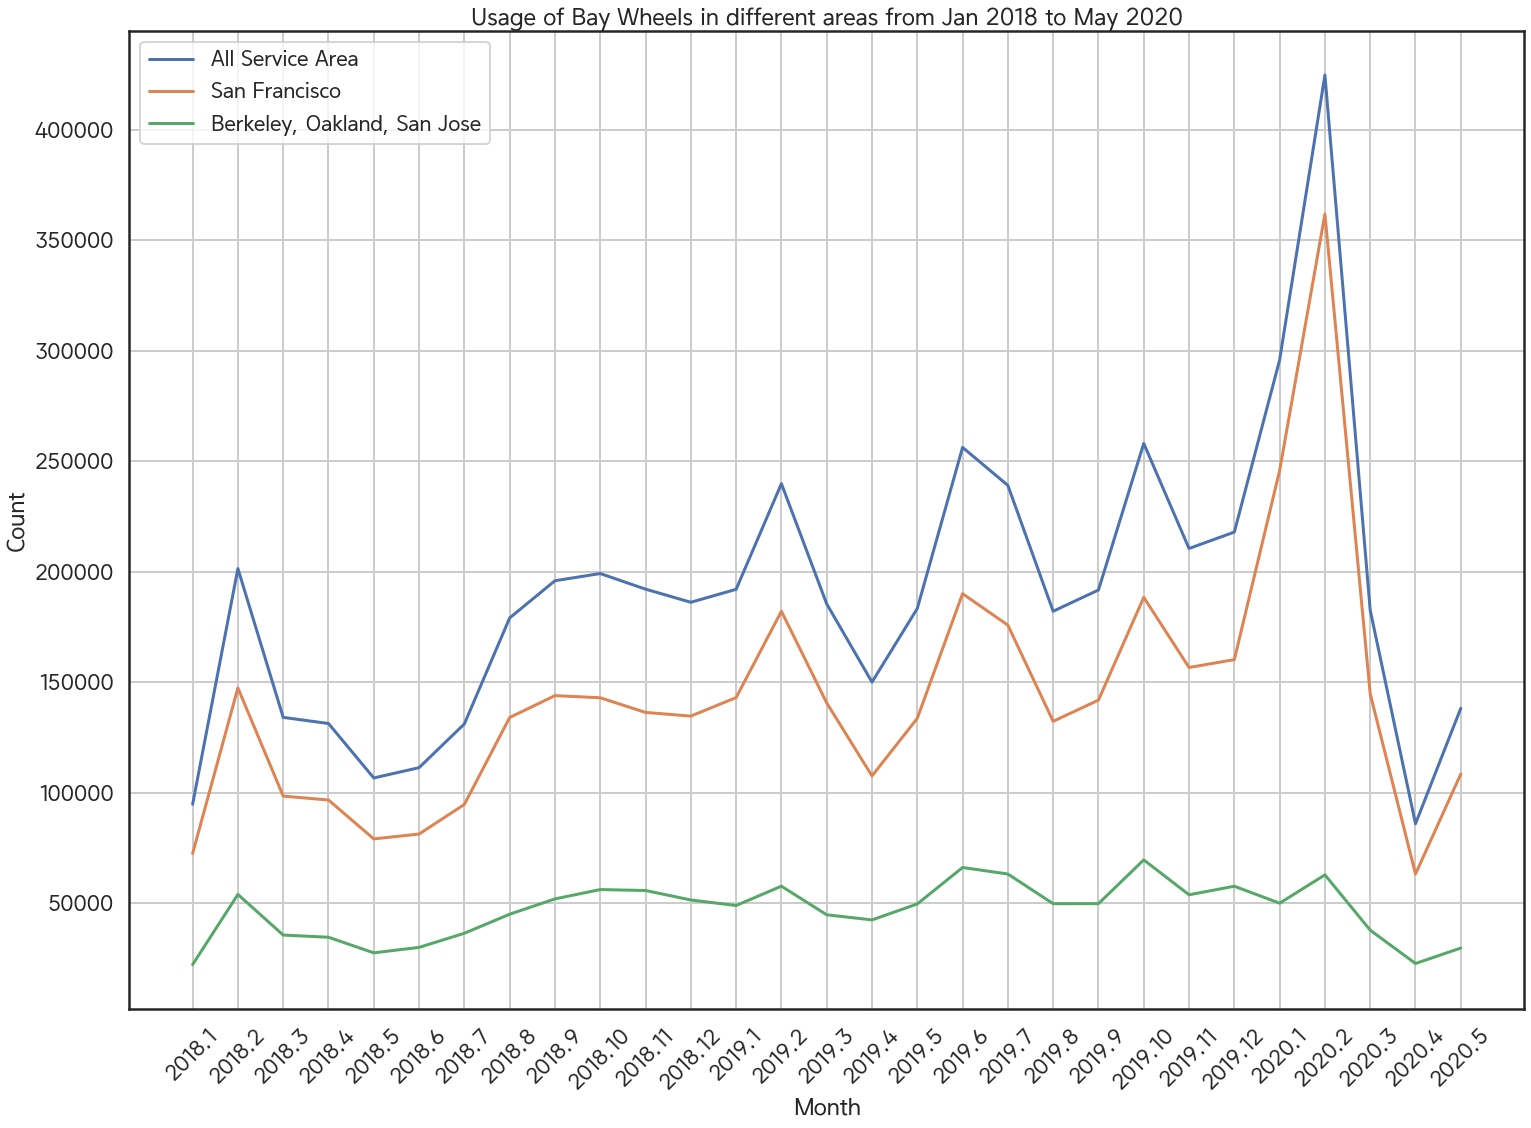

In [26]:
sns.set(font_scale=2)
sns.set_style("white")
sns.set_context("poster")
sns.set_style({'axes.grid': True, 'font.family': ['Binggrae Melona']})


pl2 = sns.lineplot(sort=False, x = dateRange, y = concatenated_df.groupby(['date']).count()['start_time'], label = 'All Service Area')
sns.lineplot(sort=False,x = dateRange, y = sfdf.groupby(['date']).count()['start_time'], label = 'San Francisco')
sns.lineplot(sort=False,x = dateRange, y = notsfdf.groupby(['date']).count()['start_time'], label = 'Berkeley, Oakland, San Jose')


pl2.set_xticks(range(len(dateRange)))
pl2.set_xticklabels(dateRange, rotation=45)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Usage of Bay Wheels in different areas from Jan 2018 to May 2020');
#plt.savefig("./usage", bbox_inches='tight', dpi=300);


plt.show()

In [27]:
sfdf.groupby(['date']).count()['start_time'].sort_index()

date
2018.1      72553
2018.10    147453
2018.11     98511
2018.12     96733
2018.2      79140
2018.3      81334
2018.4      94730
2018.5     134073
2018.6     143974
2018.7     143010
2018.8     136371
2018.9     134719
2019.1     143092
2019.10    182154
2019.11    140680
2019.12    107627
2019.2     133708
2019.3     190098
2019.4     175862
2019.5     132350
2019.6     141938
2019.7     188460
2019.8     156704
2019.9     160270
2020.1     245803
2020.2     361912
2020.3     144782
2020.4      63247
2020.5     108503
Name: start_time, dtype: int64

In [28]:
nRowsRead = None # specify 'None' if want to read whole file
# 2017-fordgobike-tripdata.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2004 = pd.read_csv('./Data/202004-baywheels-tripdata.csv', delimiter=',', nrows = nRowsRead)
df2004.dataframeName = '202004-baywheels-tripdata.csv'
nRow, nCol = df2004.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 84259 rows and 13 columns


In [29]:
sfdf[sfdf['date'] == '2020.4']['user_type'].value_counts()

casual        34536
member        27409
Subscriber     1008
Customer        294
Name: user_type, dtype: int64

In [30]:
df2004['user_type'].value_counts()

casual    46030
member    38229
Name: user_type, dtype: int64

In [31]:
sfdf.groupby(['date', 'user_type']).count()

duration_sec  start_time  end_time  start_station_id  \
date    user_type                                                          
2018.1  Customer            9624        9624      9624              9624   
        Subscriber         62929       62929     62929             62929   
2018.10 Customer           20787       20787     20787             20787   
        Subscriber        126666      126666    126666            126666   
2018.11 Customer           12105       12105     12105             12105   
        Subscriber         86406       86406     86406             86406   
2018.12 Customer           13658       13658     13658             13658   
        Subscriber         83075       83075     83075             83075   
2018.2  Customer           11426       11426     11426             11426   
        Subscriber         67714       67714     67714             67714   
2018.3  Customer           12412       12412     12412             12412   
        Subscriber         68922       68922     68922             68922   
2018.4  Customer           15736       15736     15736             15736   
        Subscriber         78994       78994     78994             78994   
2018.5  Customer           22588       22588     22588             22588   
        Subscriber        111485      111485    111485            111485   
2018.6  Customer           24795       24795     24795             24795   
        Subscriber        119179      119179    119179            119179   
2018.7  Customer           25307       25307     25307             25307   
        Subscriber        117703      117703    117703            117703   
2018.8  Customer           22765       22765     22765             22765   
        Subscriber        113606      113606    113606            113606   
2018.9  Customer           23468       23468     23468             23468   
        Subscriber        111251      111251    111251            111251   
2019.1  Customer           18634       18634     18634             18634   
        Subscriber        124458      124458    124458            124458   
2019.10 Customer           44430       44430     44430             44430   
        Subscriber        137724      137724    137724            137724   
2019.11 Customer           33133       33133     33133             33118   
        Subscriber        107547      107547    107547            107236   
2019.12 Customer           53859       53859     53859             53196   
        Subscriber         53768       53768     53768             44379   
2019.2  Customer           15991       15991     15991             15991   
        Subscriber        117717      117717    117717            117717   
2019.3  Customer           29910       29910     29910             29910   
        Subscriber        160188      160188    160188            160188   
2019.4  Customer           28734       28734     28734             28734   
        Subscriber        147128      147128    147128            147128   
2019.5  Customer           19719       19719     19719             19719   
        Subscriber        112631      112631    112631            112631   
2019.6  Customer           26202       26202     26202             26202   
        Subscriber        115736      115736    115736            115736   
2019.7  Customer           33655       33655     33655             28481   
        Subscriber        154805      154805    154805            123408   
2019.8  Customer           35201       35201     35201             35201   
        Subscriber        121503      121503    121503            121503   
2019.9  Customer           40998       40998     40998             40998   
        Subscriber        119272      119272    119272            119272   
2020.1  Customer           91860       91860     91860             74892   
        Subscriber        153943      153943    153943             36706   
2020.2  Customer          112777      112777    112777             7

In [32]:
df2004['star_hour'] = pd.DatetimeIndex(df2004['start_time']).hour

In [33]:
df2004.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,star_hour
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual,8
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual,18
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual,15
3,301F57EB0197A5E0,electric_bike,2020-04-03 20:21:03,2020-04-03 22:08:06,8th St at Ringold St,60.0,NaN,NaN,37.7744,-122.4095,37.7805,-122.4033,casual,20
4,9429C701AF5744B3,electric_bike,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,NaN,NaN,37.8027,-122.4433,37.8009,-122.4269,casual,18


In [34]:
plt.figure(figsize=(10, 7))
hourly_means = sfdf.groupby(['date', 'user_type']).count()['start_time']
hourly_means
#sns.lineplot(x = hourly_means.index, y = hourly_means['user_type'], label = 'Customer')
#sns.lineplot(x = hourly_means.index, y = hourly_means['user_type'], label = 'Subscriber')

date     user_type 
2018.1   Customer        9624
         Subscriber     62929
2018.10  Customer       20787
         Subscriber    126666
2018.11  Customer       12105
         Subscriber     86406
2018.12  Customer       13658
         Subscriber     83075
2018.2   Customer       11426
         Subscriber     67714
2018.3   Customer       12412
         Subscriber     68922
2018.4   Customer       15736
         Subscriber     78994
2018.5   Customer       22588
         Subscriber    111485
2018.6   Customer       24795
         Subscriber    119179
2018.7   Customer       25307
         Subscriber    117703
2018.8   Customer       22765
         Subscriber    113606
2018.9   Customer       23468
         Subscriber    111251
2019.1   Customer       18634
         Subscriber    124458
2019.10  Customer       44430
         Subscriber    137724
2019.11  Customer       33133
         Subscriber    107547
2019.12  Customer       53859
         Subscriber     53768
2019.2   Customer   

<Figure size 720x504 with 0 Axes>

In [35]:
sfdf.groupby('date').count()['start_time']

date
2018.1      72553
2018.10    147453
2018.11     98511
2018.12     96733
2018.2      79140
2018.3      81334
2018.4      94730
2018.5     134073
2018.6     143974
2018.7     143010
2018.8     136371
2018.9     134719
2019.1     143092
2019.10    182154
2019.11    140680
2019.12    107627
2019.2     133708
2019.3     190098
2019.4     175862
2019.5     132350
2019.6     141938
2019.7     188460
2019.8     156704
2019.9     160270
2020.1     245803
2020.2     361912
2020.3     144782
2020.4      63247
2020.5     108503
Name: start_time, dtype: int64

In [36]:
sfdf.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date
0,598.0,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,1035.0,Subscriber,No,NaN,NaN,NaN,NaN,2,2018,2018.2
1,943.0,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,1673.0,Customer,No,NaN,NaN,NaN,NaN,2,2018,2018.2
2,18587.0,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3498.0,Customer,No,NaN,NaN,NaN,NaN,2,2018,2018.2
3,18558.0,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3129.0,Customer,No,NaN,NaN,NaN,NaN,2,2018,2018.2
17,258.0,2018-02-28 23:02:02.5250,2018-02-28 23:06:21.4980,88.0,11th St at Bryant St,37.770030,-122.411726,336.0,Potrero Ave and Mariposa St,37.763281,...,2011.0,Subscriber,No,NaN,NaN,NaN,NaN,2,2018,2018.2


In [37]:
sfdf[sfdf['date'] == '2020.2']

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date
3904998,1364.0,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,...,12402.0,Customer,NaN,NaN,NaN,NaN,NaN,2,2020,2020.2
3904999,836.0,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,...,2302.0,Customer,NaN,NaN,NaN,NaN,NaN,2,2020,2020.2
3905004,1001.0,2020-02-29 23:36:02.9230,2020-02-29 23:52:44.6450,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,39.0,Scott St at Golden Gate Ave,37.778999,...,11867.0,Customer,NaN,NaN,NaN,NaN,NaN,2,2020,2020.2
3905006,898.0,2020-02-29 23:35:54.7540,2020-02-29 23:50:53.7240,95.0,Sanchez St at 15th St,37.766219,-122.431060,33.0,Golden Gate Ave at Hyde St,37.781650,...,11250.0,Customer,NaN,NaN,NaN,NaN,NaN,2,2020,2020.2
3905010,370.0,2020-02-29 23:44:08.8350,2020-02-29 23:50:19.5760,105.0,16th St at Prosper St,37.764285,-122.431804,223.0,16th St Mission BART Station 2,37.764765,...,9861.0,Customer,NaN,NaN,NaN,NaN,NaN,2,2020,2020.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337346,2321.0,2020-02-27 17:29:40,2020-02-27 18:08:22,NaN,NaN,37.810553,-122.476472,NaN,NaN,37.789625,...,157125.0,Subscriber,NaN,app,NaN,NaN,NaN,2,2020,2020.2
4337347,1526.0,2020-02-01 18:01:12,2020-02-01 18:26:39,NaN,NaN,37.810568,-122.410974,NaN,NaN,37.807980,...,648380.0,Customer,NaN,app,NaN,NaN,NaN,2,2020,2020.2
4337348,2596.0,2020-02-04 15:39:49,2020-02-04 16:23:06,NaN,NaN,37.810572,-122.476453,NaN,NaN,37.806278,...,438416.0,Subscriber,NaN,app,NaN,NaN,NaN,2,2020,2020.2
4337349,3072.0,2020-02-25 20:22:22,2020-02-25 21:13:34,NaN,NaN,37.810688,-122.410335,NaN,NaN,37.807886,...,926639.0,Customer,NaN,app,NaN,NaN,NaN,2,2020,2020.2


In [38]:
pd.DatetimeIndex(sfdf['start_time']).day

Int64Index([28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
            ...
             1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='start_time', length=4139791)

In [39]:
sfdf['start_hour'] = pd.DatetimeIndex(sfdf['start_time']).hour

/Users/hwkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
sfdf['day'] = pd.DatetimeIndex(sfdf['start_time']).day

/Users/hwkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
sfdf.groupby('day').count()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour
day,,,,,,,,,,,,,,,,,,,,,
1,126444,130996,130996,108011,108041,130996,130996,108046,108084,130992,...,130996,96233,25748,4552,4552,2762,130996,130996,130996,130996
2,120640,126089,126089,111180,111214,126089,126089,111319,111350,126082,...,126089,91845,16953,5449,5449,3780,126089,126089,126089,126089
3,128502,134891,134891,118936,118969,134891,134891,119022,119054,134875,...,134891,94500,18938,6389,6389,4342,134891,134891,134891,134891
4,131593,134780,134780,119572,119608,134780,134780,119811,119850,134777,...,134780,99278,19278,3187,3187,2302,134780,134780,134780,134780
5,132796,136329,136329,121049,121084,136329,136329,121110,121150,136318,...,136329,99754,19476,3533,3533,2342,136329,136329,136329,136329
6,132956,136438,136438,120851,120917,136438,136438,120927,120992,136430,...,136438,98829,19976,3482,3482,2639,136438,136438,136438,136438
7,133487,138100,138100,123021,123070,138100,138100,122859,122907,138097,...,138100,106095,17906,4613,4613,2833,138100,138100,138100,138100
8,130269,135276,135276,120902,120952,135276,135276,120875,120924,135272,...,135276,104361,16431,5007,5007,3438,135276,135276,135276,135276
9,131531,137066,137066,123896,123950,137066,137066,123941,123997,137060,...,137066,101769,16229,5535,5535,3769,137066,137066,137066,137066


In [42]:
sfdf[sfdf['date'] == '2020.5'].groupby('user_type').count()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
user_type,,,,,,,,,,,,,,,,,,,,,
casual,0,67779,67779,40706,40706,67779,67779,37635,37635,67684,...,0,0,67779,67779,67779,67779,67779,67779,67779,67779
member,0,40724,40724,30343,30343,40724,40724,31779,31779,40694,...,0,0,40724,40724,40724,40724,40724,40724,40724,40724


In [43]:
sfdf[sfdf['date'] == '2020.2'].groupby('day').count()['start_time']

day
1     10688
2      8684
3     12636
4     13224
5     13871
6     14281
7     14134
8     11237
9      8599
10    13723
11    14817
12    14784
13    14071
14    13199
15    10092
16     9629
17    10261
18    13482
19    14140
20    14483
21    14453
22     9572
23     9455
24    13055
25    14209
26    14094
27    14718
28    13781
29     8540
Name: start_time, dtype: int64

In [44]:
sfdf[sfdf['date'] == '2020.2'][sfdf['user_type'] == 'Subscriber'].groupby('day').count()['start_time']

/Users/hwkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


day
1      7493
2      6400
3      9085
4      9727
5     10121
6     10337
7     10210
8      7755
9      6186
10     9322
11    10163
12    10325
13     9933
14     8912
15     6769
16     6283
17     7300
18     9287
19     9841
20    10176
21     9945
22     6690
23     6461
24     8477
25     9025
26     8867
27     9254
28     8998
29     5793
Name: start_time, dtype: int64

In [45]:
sfdf[sfdf['date'] == '2020.5'][sfdf['user_type'] == 'member'].groupby('start_hour').count()

/Users/hwkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,day
start_hour,,,,,,,,,,,,,,,,,,,,,
0,0,237,237,162,162,237,237,180,180,237,...,237,0,0,237,237,237,237,237,237,237
1,0,135,135,84,84,135,135,97,97,135,...,135,0,0,135,135,135,135,135,135,135
2,0,101,101,64,64,101,101,71,71,101,...,101,0,0,101,101,101,101,101,101,101
3,0,81,81,52,52,81,81,61,61,81,...,81,0,0,81,81,81,81,81,81,81
4,0,173,173,135,135,173,173,135,135,173,...,173,0,0,173,173,173,173,173,173,173
5,0,192,192,132,132,192,192,150,150,191,...,192,0,0,192,192,192,192,192,192,192
6,0,775,775,593,593,775,775,587,587,774,...,775,0,0,775,775,775,775,775,775,775
7,0,1516,1516,1145,1145,1516,1516,1179,1179,1513,...,1516,0,0,1516,1516,1516,1516,1516,1516,1516
8,0,1589,1589,1207,1207,1589,1589,1290,1290,1588,...,1589,0,0,1589,1589,1589,1589,1589,1589,1589


In [46]:
sfdf[sfdf['date'] == '2020.5'].groupby('start_hour').count()[['start_time', 'end_time']]

,start_time,end_time
start_hour,,
0,690,690
1,430,430
2,319,319
3,262,262
4,320,320
5,413,413
6,1363,1363
7,2429,2429
8,3191,3191


In [47]:
sfdf.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
0,598.0,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
1,943.0,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
2,18587.0,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,18,28
3,18558.0,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,18,28
17,258.0,2018-02-28 23:02:02.5250,2018-02-28 23:06:21.4980,88.0,11th St at Bryant St,37.770030,-122.411726,336.0,Potrero Ave and Mariposa St,37.763281,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28


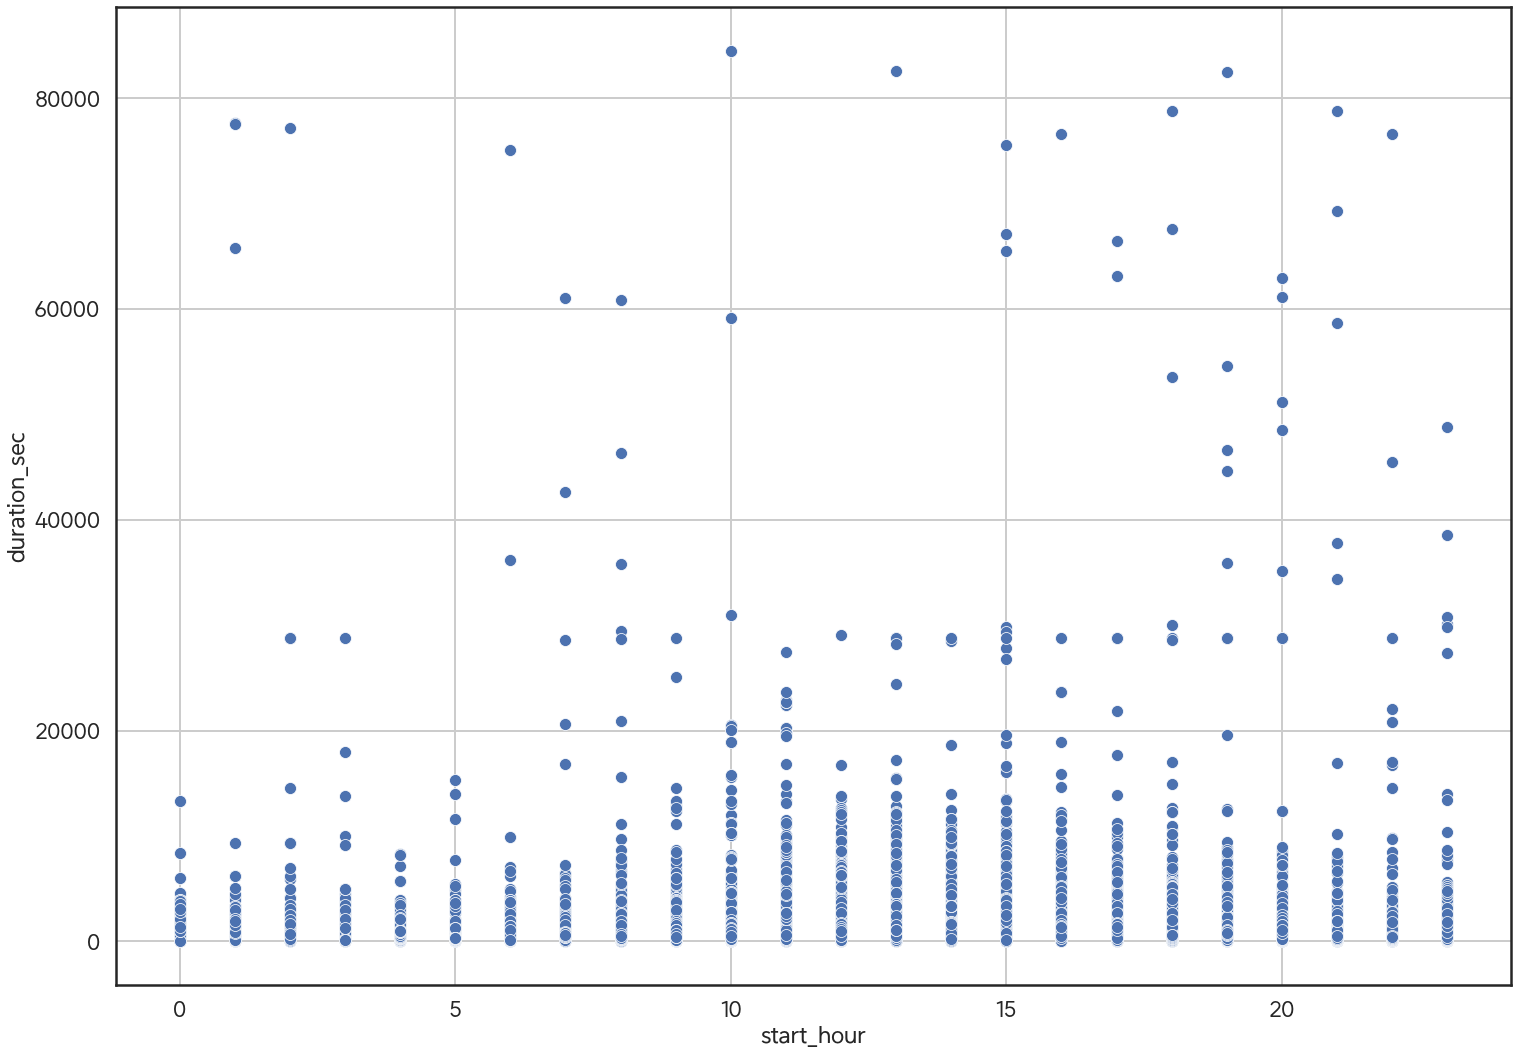

In [48]:
sns.scatterplot(data = sfdf[sfdf['date'] == '2020.3'], x = 'start_hour', y = 'duration_sec')

In [49]:
sfdf[sfdf['date'] == '2020.4']

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
4586984,NaN,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,37.769200,-122.420900,NaN,NaN,37.770300,...,NaN,NaN,5A1FF31692371859,electric_bike,NaN,4,2020,2020.4,8,4
4586985,NaN,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,37.802300,-122.424400,NaN,NaN,37.802300,...,NaN,NaN,D8D5BA2D4F051133,electric_bike,NaN,4,2020,2020.4,18,3
4586986,NaN,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,37.766700,-122.396100,NaN,NaN,37.766700,...,NaN,NaN,A3633A9140CA4FF8,electric_bike,NaN,4,2020,2020.4,15,4
4586987,NaN,2020-04-03 20:21:03,2020-04-03 22:08:06,60.0,8th St at Ringold St,37.774400,-122.409500,NaN,NaN,37.780500,...,NaN,NaN,301F57EB0197A5E0,electric_bike,NaN,4,2020,2020.4,20,3
4586988,NaN,2020-04-03 18:39:39,2020-04-03 18:47:19,NaN,NaN,37.802700,-122.443300,NaN,NaN,37.800900,...,NaN,NaN,9429C701AF5744B3,electric_bike,NaN,4,2020,2020.4,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4846828,720.0,2020-04-01 19:05:04,2020-04-01 19:17:04,NaN,NaN,37.805720,-122.406138,NaN,NaN,37.787586,...,NaN,app,NaN,NaN,NaN,4,2020,2020.4,19,1
4846949,1047.0,2020-04-01 11:25:57,2020-04-01 11:43:24,NaN,NaN,37.805837,-122.417057,439.0,Post St at Divisadero St,37.784372,...,NaN,app,NaN,NaN,NaN,4,2020,2020.4,11,1
4847211,1442.0,2020-04-01 19:38:03,2020-04-01 20:02:06,NaN,NaN,37.806275,-122.424205,115.0,Jackson Playground,37.765026,...,NaN,app,NaN,NaN,NaN,4,2020,2020.4,19,1
4847264,845.0,2020-04-01 17:00:12,2020-04-01 17:14:18,NaN,NaN,37.806371,-122.417040,NaN,NaN,37.793626,...,NaN,app,NaN,NaN,NaN,4,2020,2020.4,17,1


In [50]:
dur = (pd.DatetimeIndex(sfdf[sfdf['date'] == '2020.4']['end_time']).hour * 60 + pd.DatetimeIndex(sfdf[sfdf['date'] == '2020.4']['end_time']).minute)-(pd.DatetimeIndex(sfdf[sfdf['date'] == '2020.4']['start_time']).hour * 60 + pd.DatetimeIndex(sfdf[sfdf['date'] == '2020.4']['start_time']).minute)

In [51]:
sfdf.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
0,598.0,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
1,943.0,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
2,18587.0,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,18,28
3,18558.0,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,18,28
17,258.0,2018-02-28 23:02:02.5250,2018-02-28 23:06:21.4980,88.0,11th St at Bryant St,37.770030,-122.411726,336.0,Potrero Ave and Mariposa St,37.763281,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28


In [ ]:
sfdf

In [ ]:
temp1 = sfdf[(sfdf['date'] == '2020.1') | (sfdf['date'] == '2020.2') | (sfdf['date'] == '2020.3') | (sfdf['date'] == '2020.4') | (sfdf['date'] == '2020.5')]

In [ ]:
temp1.to_csv('./2020-sf', encoding='utf-8', index=False)


In [ ]:
temp1.head()

In [ ]:
temp1 = temp1.drop(['is_equity','rideable_type','ride_id','rental_access_method','bike_share_for_all_trip','bike_id','duration_sec', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], axis=1)

In [ ]:
temp1.info()

In [ ]:
temp2001 = sfdf[(sfdf['date'] == '2020.1')]
temp2002 = sfdf[(sfdf['date'] == '2020.2')]
temp2003 = sfdf[(sfdf['date'] == '2020.3')]
temp2004 = sfdf[(sfdf['date'] == '2020.4')]
temp2005 = sfdf[(sfdf['date'] == '2020.5')]

In [ ]:
temp1.to_csv('./20201-sf.csv', encoding='utf-8', index=False)
temp2.to_csv('./20202-sf.csv', encoding='utf-8', index=False)
temp3.to_csv('./20203-sf.csv', encoding='utf-8', index=False)
temp4.to_csv('./20204-sf.csv', encoding='utf-8', index=False)
temp5.to_csv('./20205-sf.csv', encoding='utf-8', index=False)

In [53]:
sfdf

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
0,598.0,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
1,943.0,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
2,18587.0,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,18,28
3,18558.0,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,18,28
17,258.0,2018-02-28 23:02:02.5250,2018-02-28 23:06:21.4980,88.0,11th St at Bryant St,37.770030,-122.411726,336.0,Potrero Ave and Mariposa St,37.763281,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498214,111.0,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,...,No,NaN,NaN,NaN,NaN,2,2019,2019.2,0,1
5498215,706.0,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,...,No,NaN,NaN,NaN,NaN,2,2019,2019.2,0,1
5498216,480.0,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,No,NaN,NaN,NaN,NaN,2,2019,2019.2,0,1
5498217,313.0,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,No,NaN,NaN,NaN,NaN,2,2019,2019.2,0,1


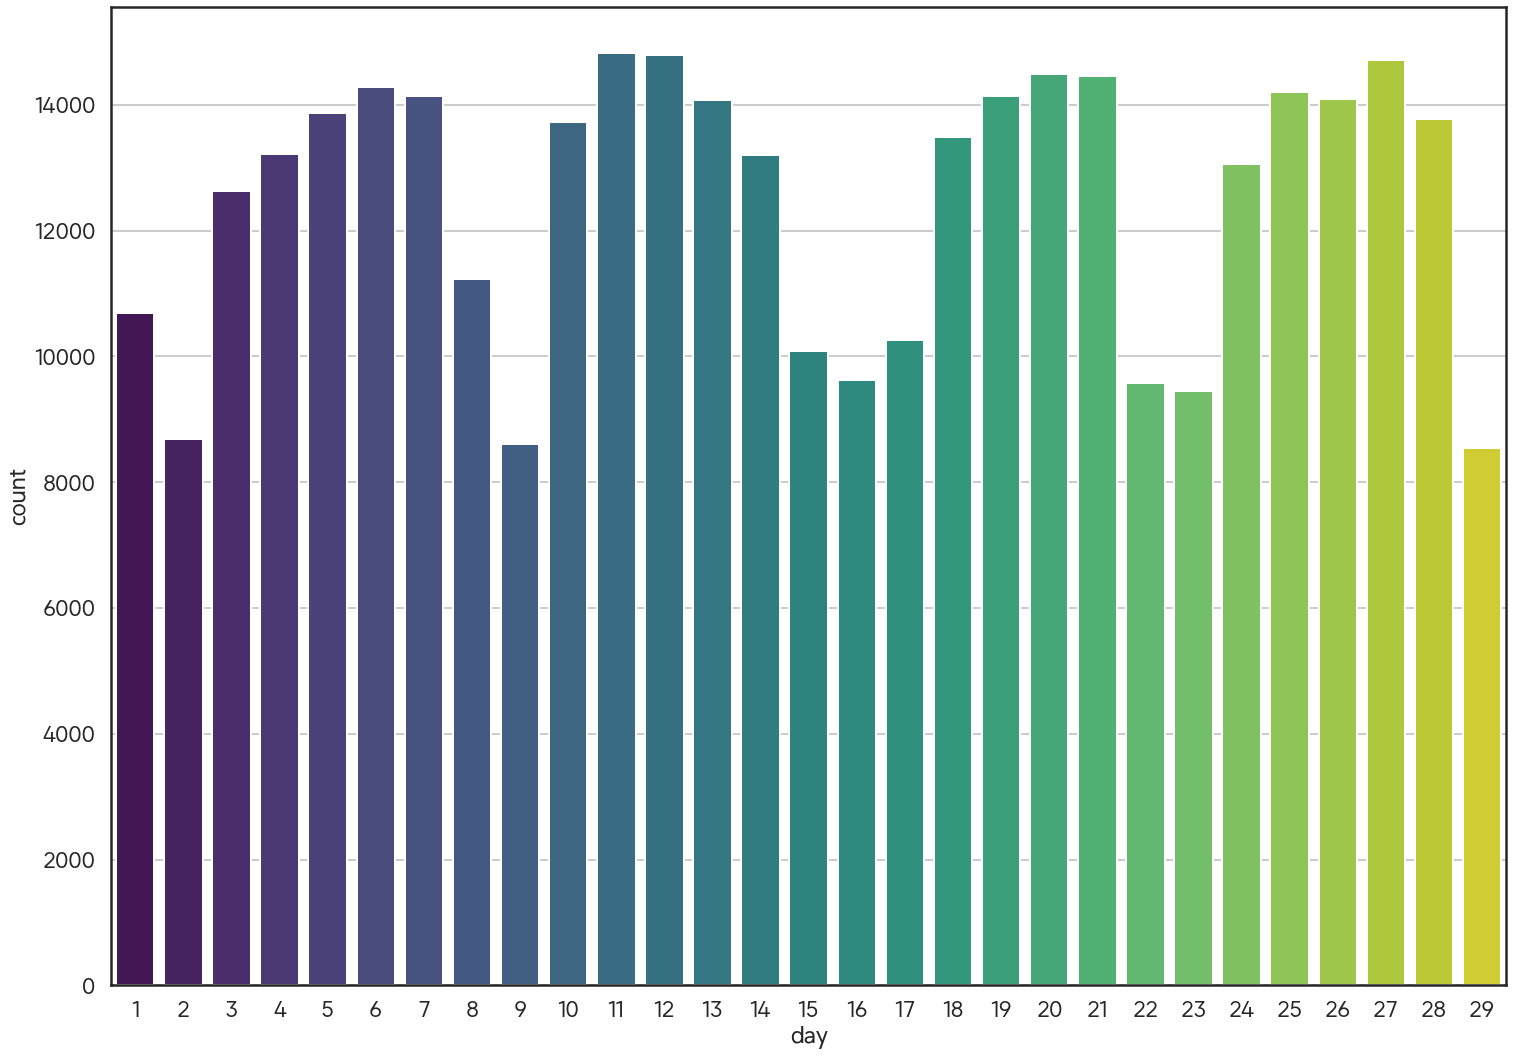

In [54]:
feb20 = sfdf[sfdf['start_time'].between("2020-02-01", "2020-02-30", inclusive=True)]
feb20.groupby("day").count()["start_time"]
sns.countplot(x='day', palette='viridis', data=feb20)

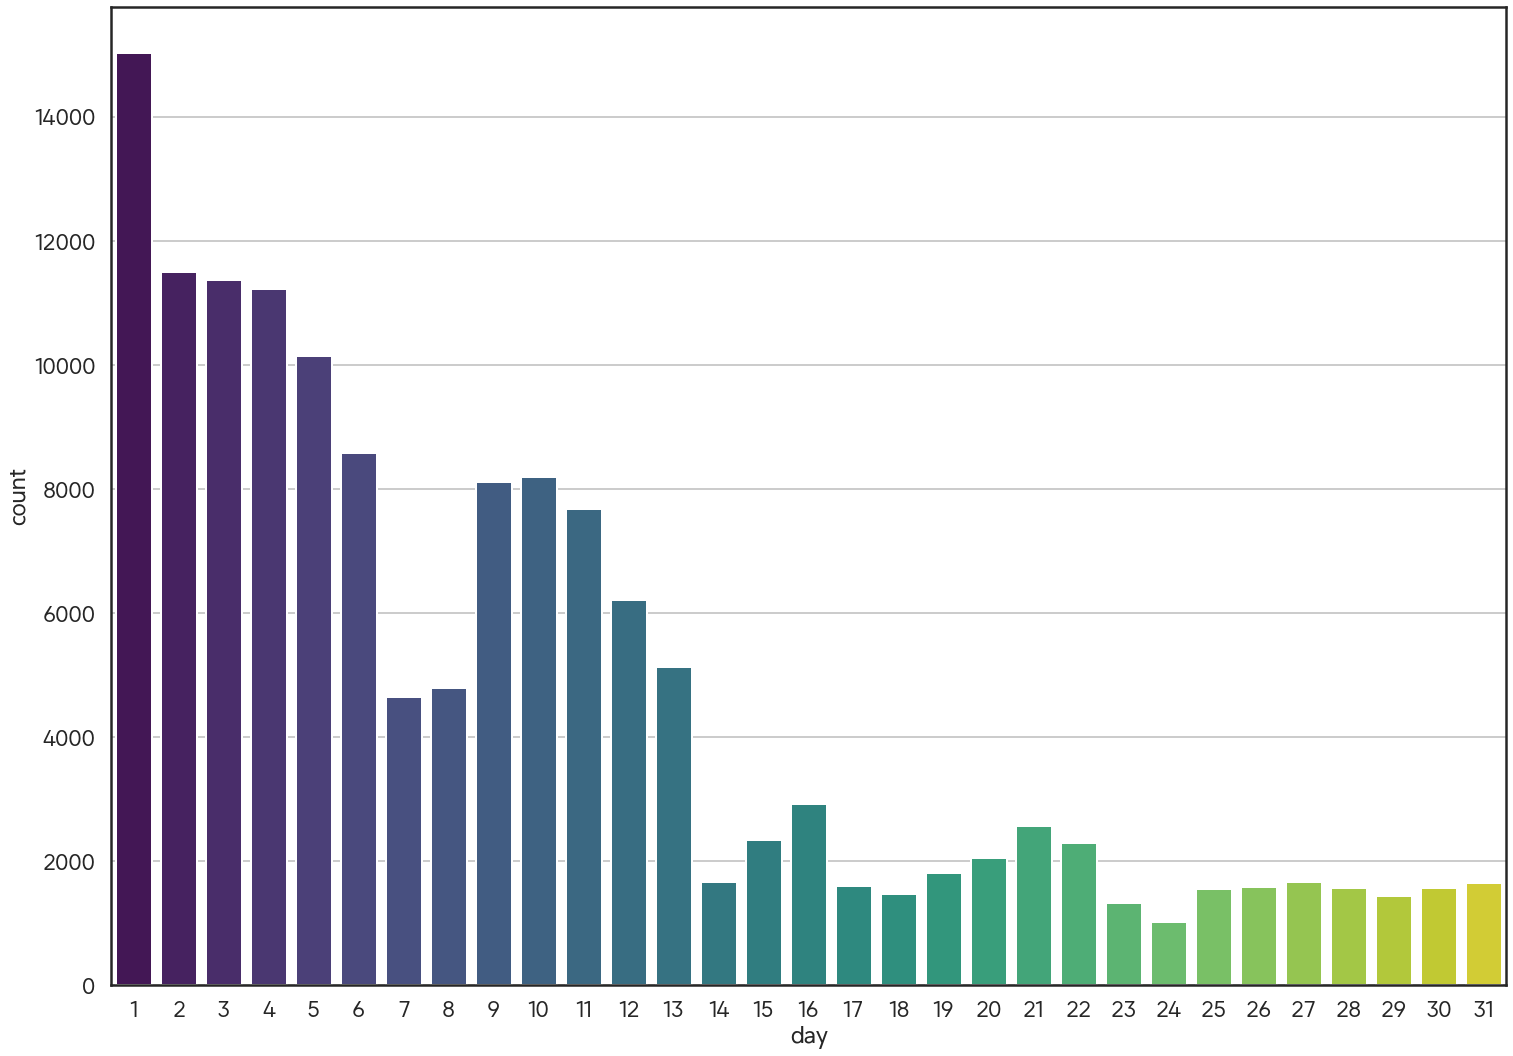

In [55]:
mar20 = sfdf[sfdf['start_time'].between("2020-03-01", "2020-03-32", inclusive=True)]
mar20.groupby("day").count()["start_time"]
sns.countplot(x='day', palette='viridis', data=mar20)

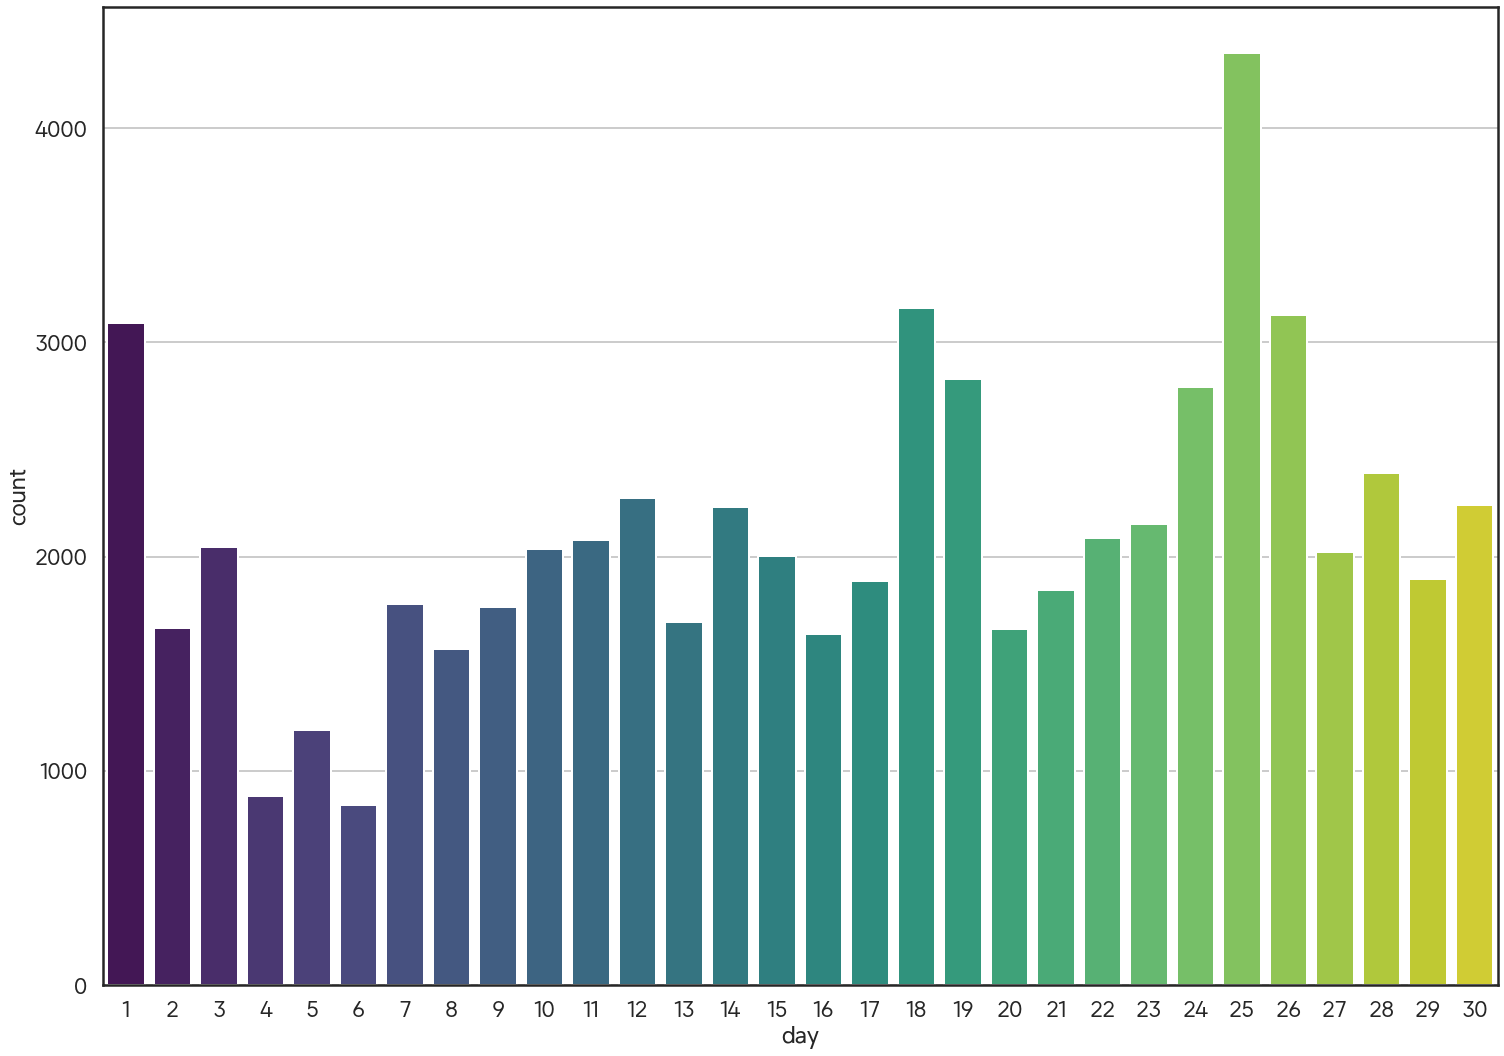

In [56]:
apr20 = sfdf[sfdf['start_time'].between("2020-04-01", "2020-04-32", inclusive=True)]
apr20.groupby("day").count()["start_time"]
sns.countplot(x='day', palette='viridis', data=apr20)

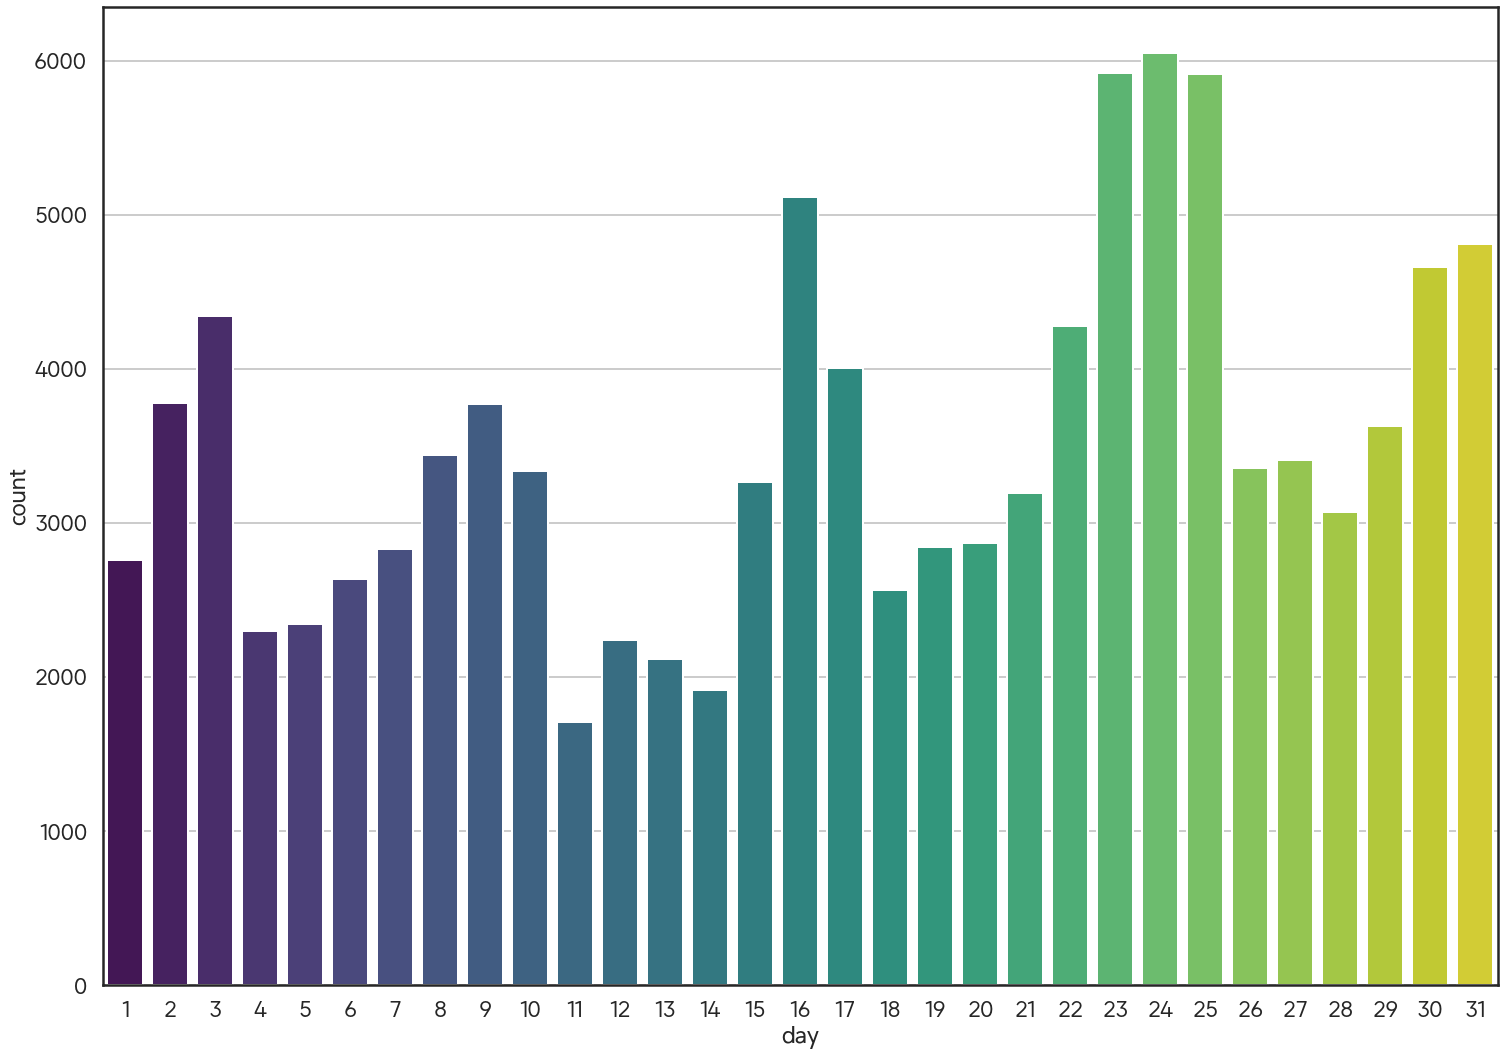

In [57]:
may20 = sfdf[sfdf['start_time'].between("2020-05-01", "2020-05-32", inclusive=True)]
may20.groupby("day").count()["start_time"]
sns.countplot(x='day', palette='viridis', data=may20)

In [58]:
shelter_in_place = sfdf[sfdf['start_time'].between("2020-03-17", "2020-05-32", inclusive=True)]
shelter_in_place.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
4337352,NaN,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,37.7286,-122.4921,NaN,NaN,37.7154,...,NaN,NaN,92634E825C7303CC,electric_bike,False,5,2020,2020.5,16,19
4337353,NaN,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,37.7919,-122.4174,492.0,Webster St at Clay St,37.7906,...,NaN,NaN,1FCDD14C62521CC1,electric_bike,False,5,2020,2020.5,20,18
4337354,NaN,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,37.7557,-122.4165,NaN,NaN,37.7681,...,NaN,NaN,3A5CEC684CA9FA18,electric_bike,False,5,2020,2020.5,14,19
4337355,NaN,2020-05-10 17:45:54,2020-05-10 18:29:29,12.0,Pier 1/2 at The Embarcadero,37.7964,-122.3946,NaN,NaN,37.7780,...,NaN,NaN,1FF95A9C2D1ED7F8,electric_bike,False,5,2020,2020.5,17,10
4337356,NaN,2020-05-11 08:45:24,2020-05-11 08:52:55,NaN,NaN,37.7856,-122.4134,NaN,NaN,37.7894,...,NaN,NaN,E0937CAFF4D56EC0,electric_bike,False,5,2020,2020.5,8,11


In [59]:
shelter_in_place.to_csv('./shelter_in_place-sf.csv', encoding='utf-8', index=False)

In [60]:
shelter_in_place.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
4337352,NaN,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,37.7286,-122.4921,NaN,NaN,37.7154,...,NaN,NaN,92634E825C7303CC,electric_bike,False,5,2020,2020.5,16,19
4337353,NaN,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,37.7919,-122.4174,492.0,Webster St at Clay St,37.7906,...,NaN,NaN,1FCDD14C62521CC1,electric_bike,False,5,2020,2020.5,20,18
4337354,NaN,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,37.7557,-122.4165,NaN,NaN,37.7681,...,NaN,NaN,3A5CEC684CA9FA18,electric_bike,False,5,2020,2020.5,14,19
4337355,NaN,2020-05-10 17:45:54,2020-05-10 18:29:29,12.0,Pier 1/2 at The Embarcadero,37.7964,-122.3946,NaN,NaN,37.7780,...,NaN,NaN,1FF95A9C2D1ED7F8,electric_bike,False,5,2020,2020.5,17,10
4337356,NaN,2020-05-11 08:45:24,2020-05-11 08:52:55,NaN,NaN,37.7856,-122.4134,NaN,NaN,37.7894,...,NaN,NaN,E0937CAFF4D56EC0,electric_bike,False,5,2020,2020.5,8,11


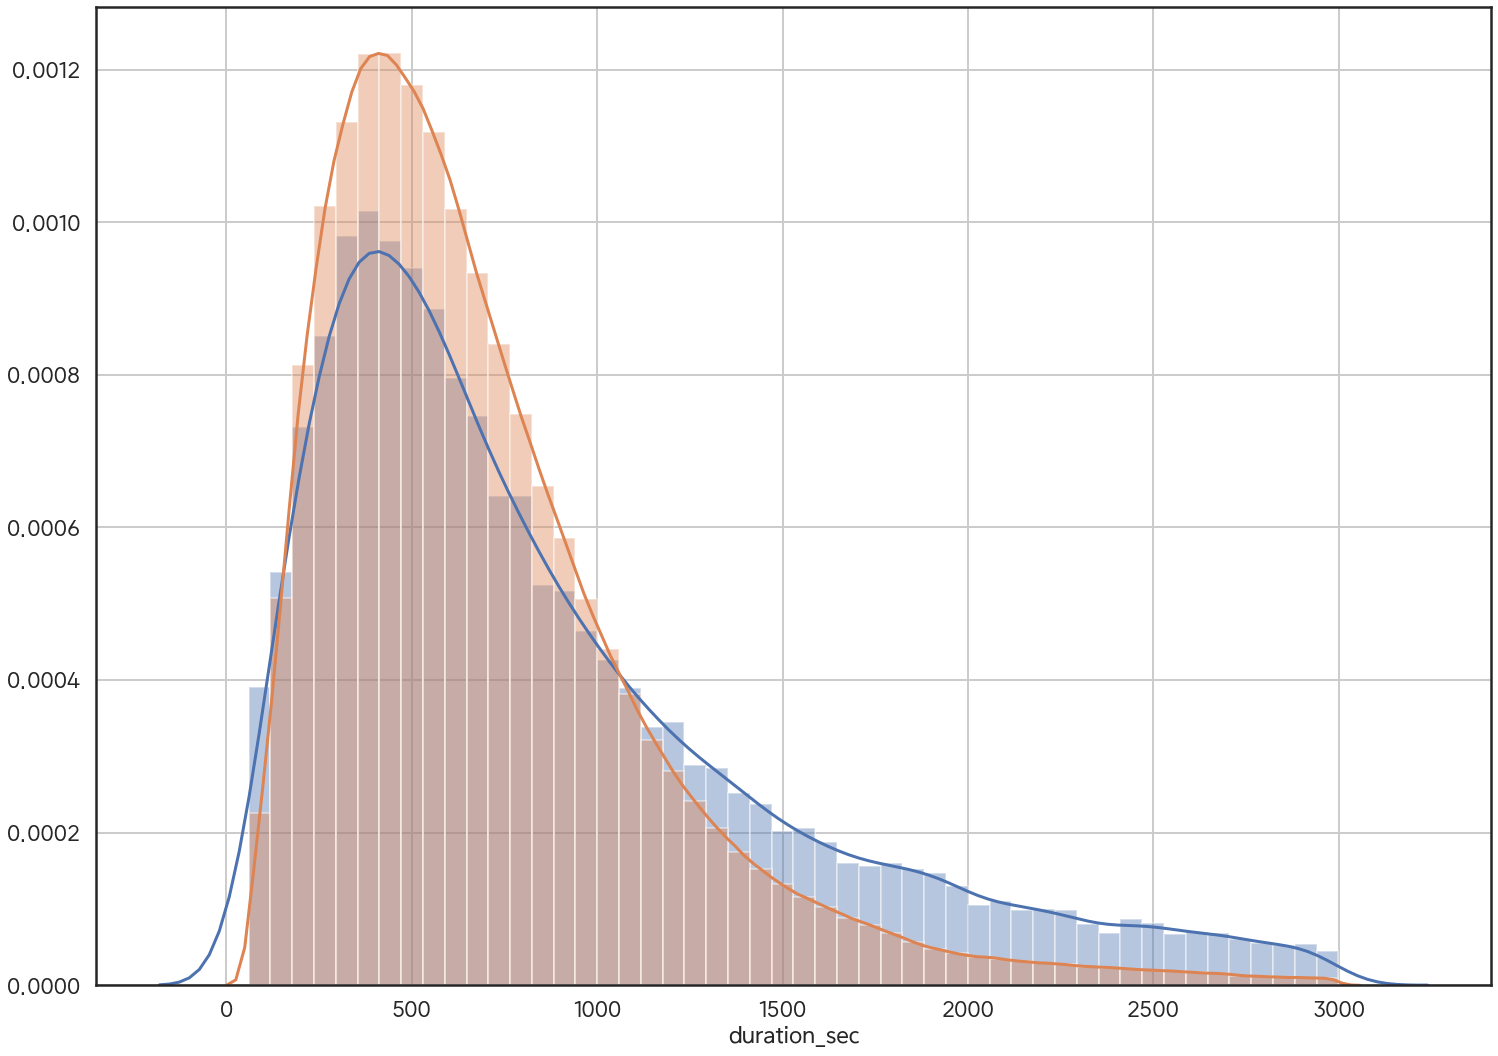

In [70]:
duration_filtered1 = shelter_in_place[(shelter_in_place["duration_sec"] < 3000)]
sns.distplot(duration_filtered1["duration_sec"], kde=True, rug=False)

before_shelter_in_place = sfdf[sfdf['start_time'].between("2018-01-01", "2020-03-16", inclusive=True)]
duration_filtered2 = before_shelter_in_place[(before_shelter_in_place["duration_sec"] < 3000)]
sns.distplot(duration_filtered2["duration_sec"], kde=True, rug=False)
fig.legend(labels=['Before Shelter in Place','After Shelter in Place'])


plt.show()


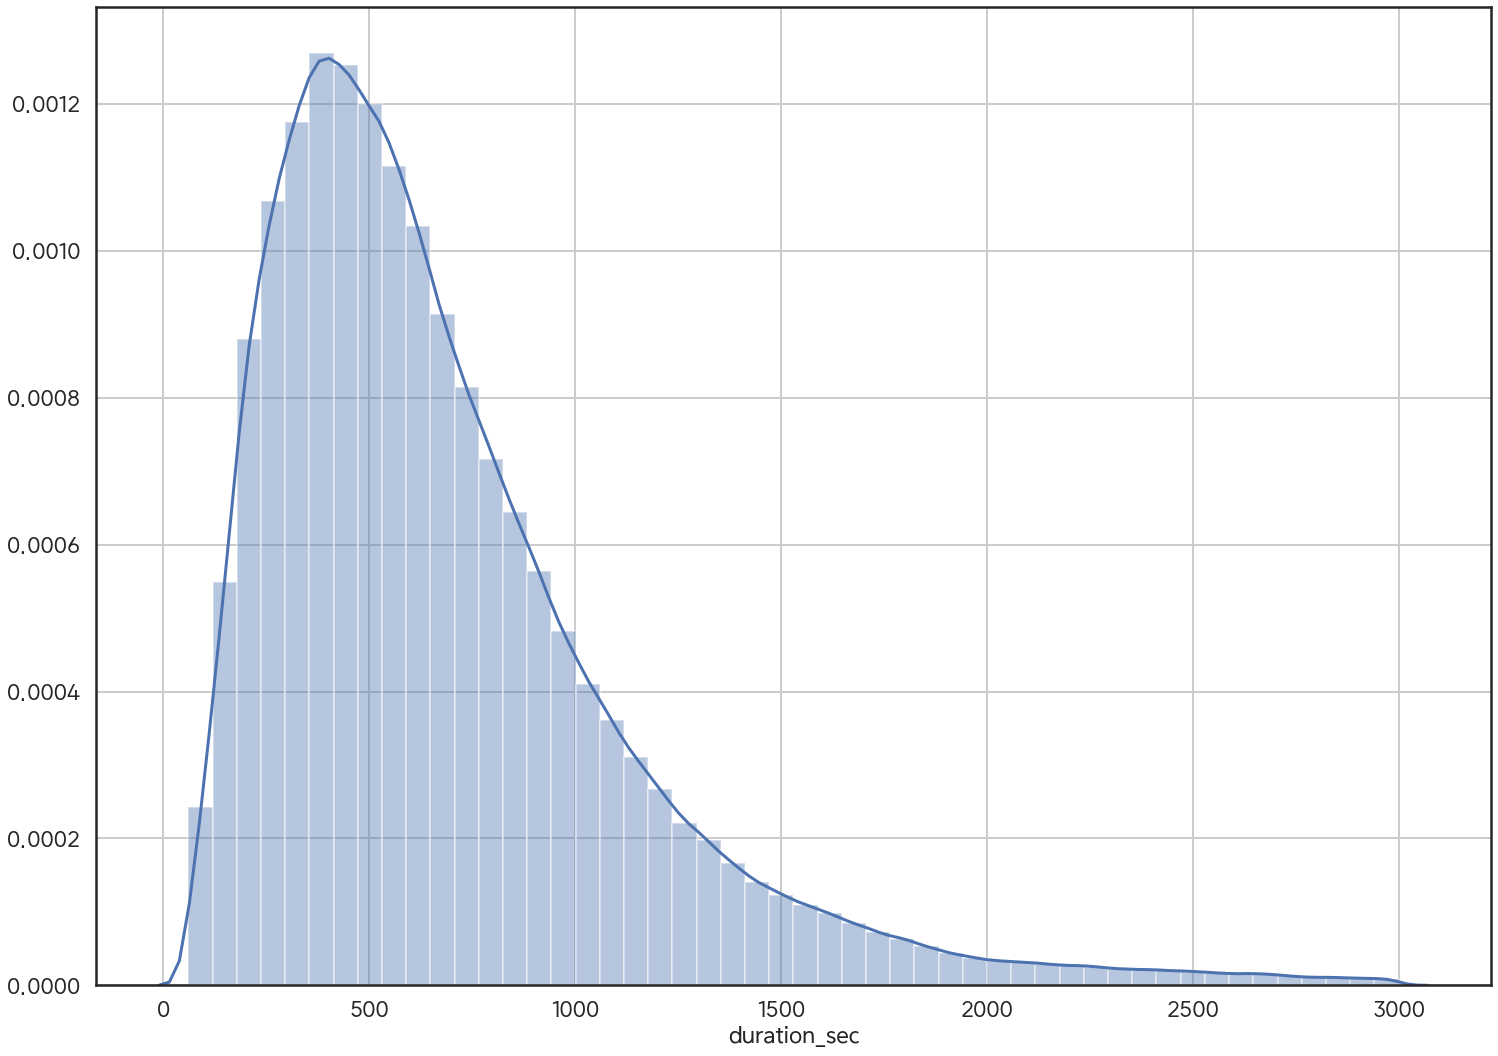

In [62]:
before_corona1 = sfdf[sfdf['start_time'].between("2018-01-01", "2018-12-31", inclusive=True)]
duration_filtered = before_corona1[(before_corona1["duration_sec"] < 3000)]
sns.distplot(duration_filtered["duration_sec"], kde=True, rug=False)
plt.show()


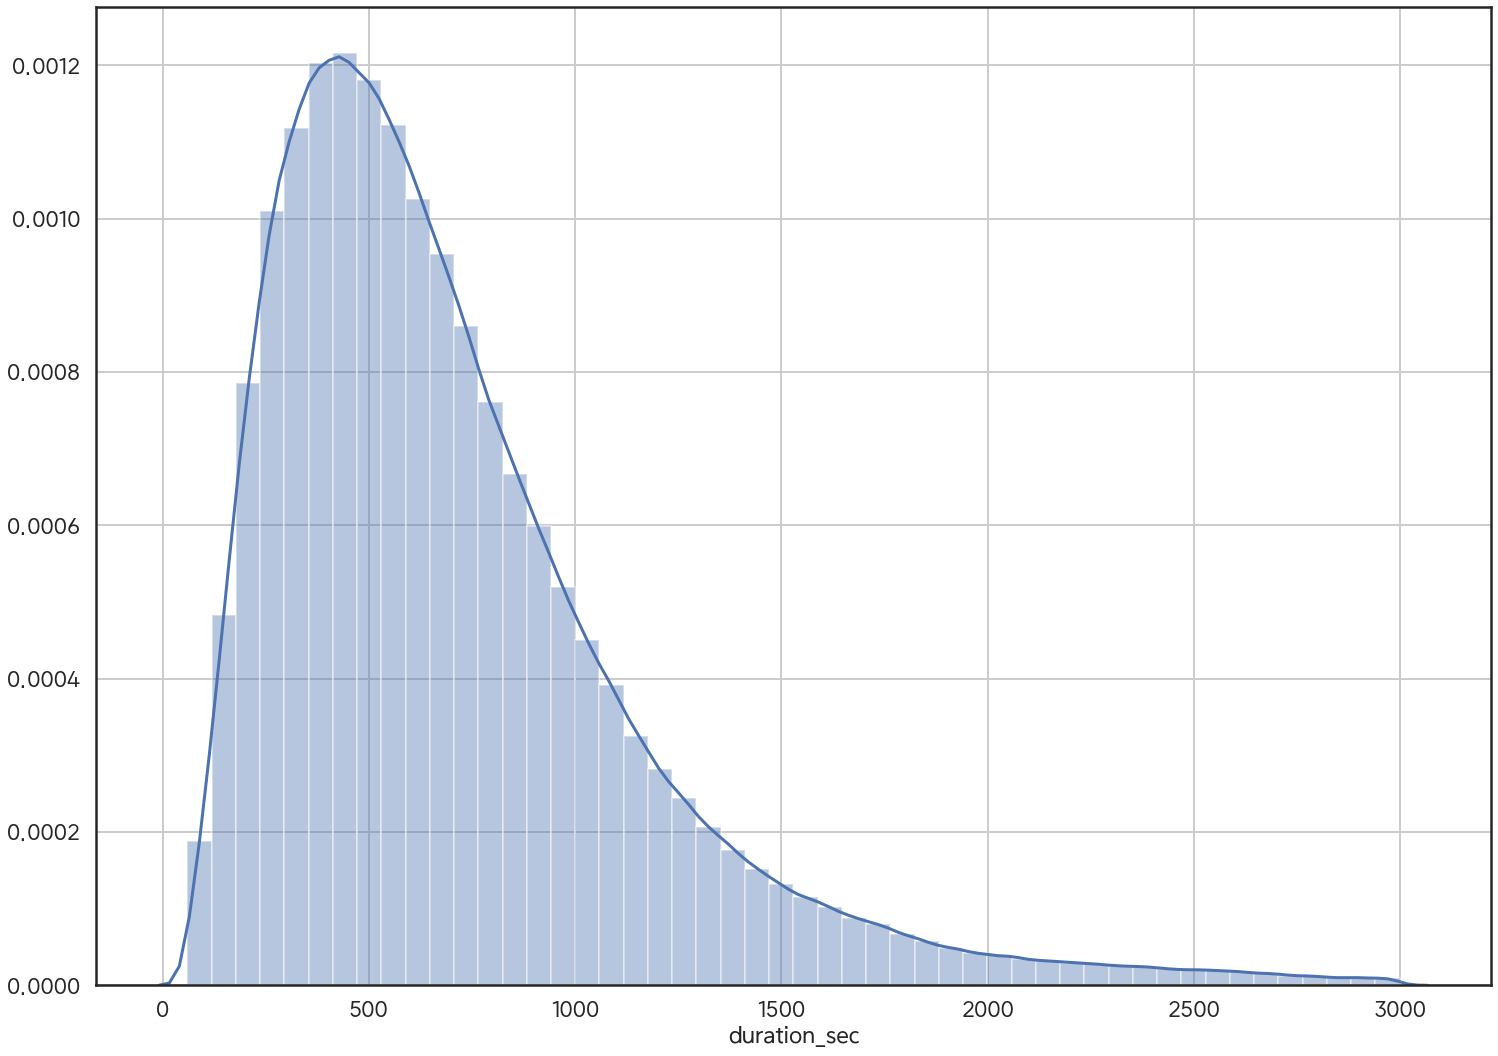

In [63]:
before_corona2 = sfdf[sfdf['start_time'].between("2019-01-01", "2019-12-31", inclusive=True)]
duration_filtered = before_corona2[(before_corona2["duration_sec"] < 3000)]
sns.distplot(duration_filtered["duration_sec"], kde=True, rug=False)
plt.show()


In [64]:
before_shelter_in_place

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
0,598.0,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
1,943.0,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
2,18587.0,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,18,28
3,18558.0,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,18,28
17,258.0,2018-02-28 23:02:02.5250,2018-02-28 23:06:21.4980,88.0,11th St at Bryant St,37.770030,-122.411726,336.0,Potrero Ave and Mariposa St,37.763281,...,No,NaN,NaN,NaN,NaN,2,2018,2018.2,23,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498214,111.0,2019-02-01 00:14:49.8740,2019-02-01 00:16:41.3010,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,...,No,NaN,NaN,NaN,NaN,2,2019,2019.2,0,1
5498215,706.0,2019-02-01 00:04:40.6160,2019-02-01 00:16:27.0800,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,...,No,NaN,NaN,NaN,NaN,2,2019,2019.2,0,1
5498216,480.0,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,No,NaN,NaN,NaN,NaN,2,2019,2019.2,0,1
5498217,313.0,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,No,NaN,NaN,NaN,NaN,2,2019,2019.2,0,1


/Users/hwkim/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hwkim/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


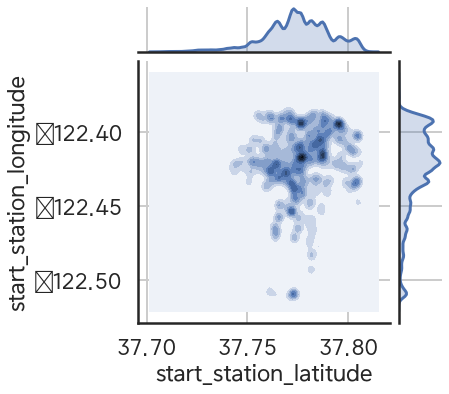

In [65]:
sns.jointplot(x="start_station_latitude", y="start_station_longitude", data=shelter_in_place, kind="kde")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


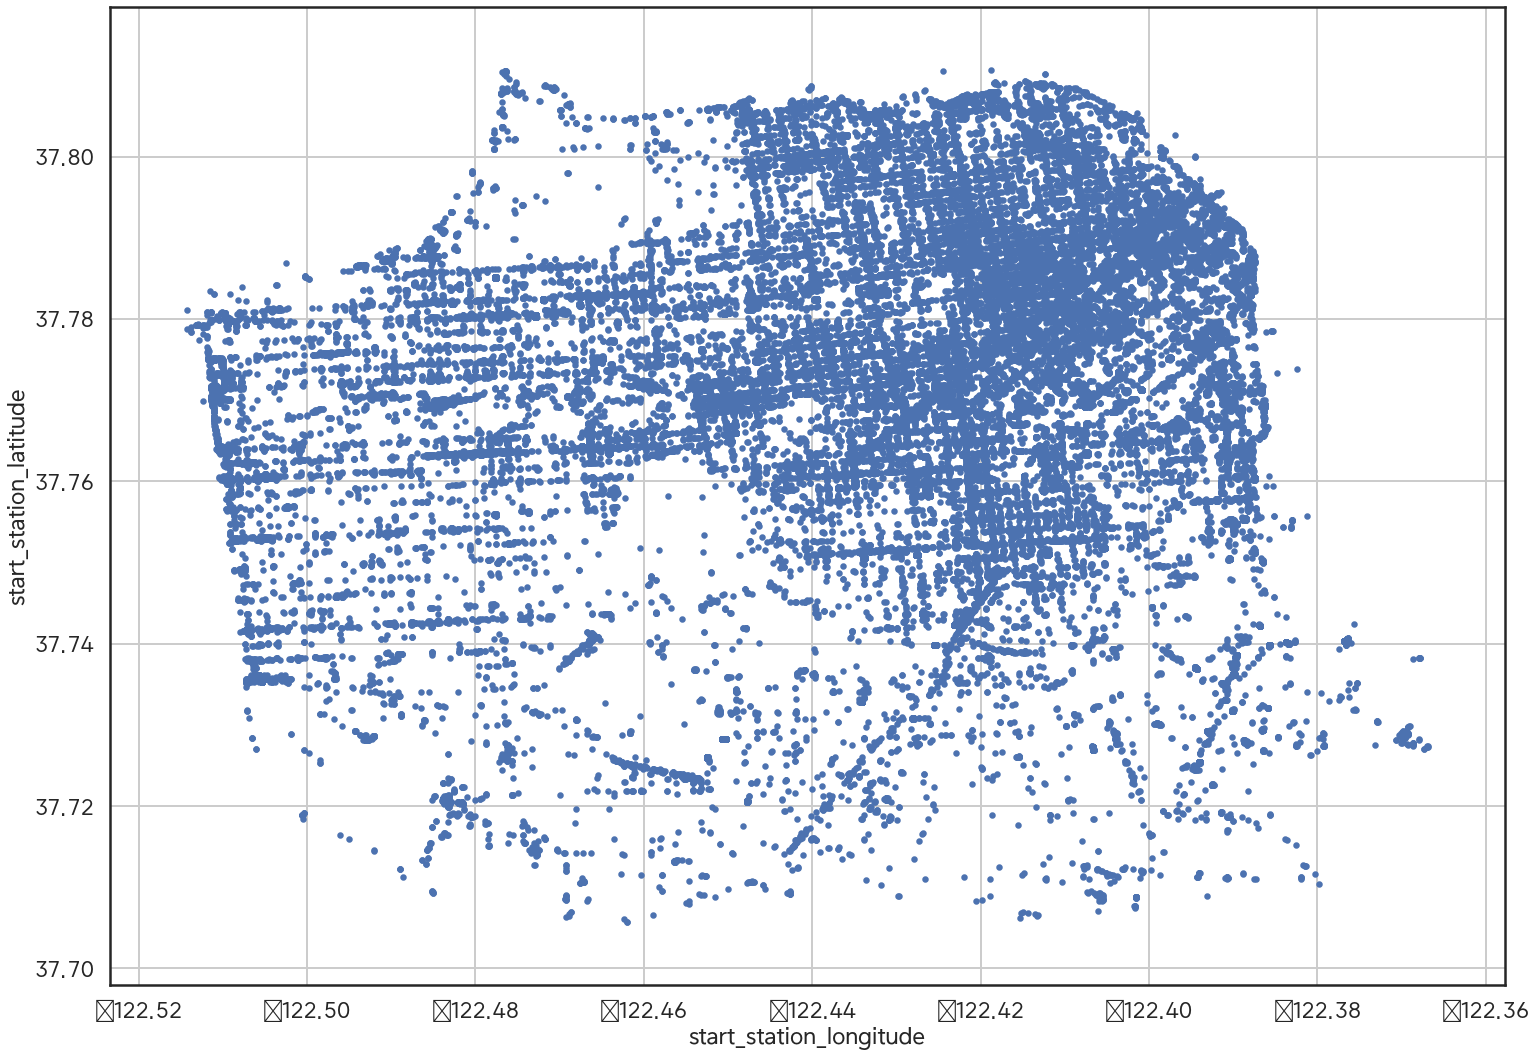

In [66]:
shelter_in_place.plot(kind = "scatter", x = "start_station_longitude", y = "start_station_latitude")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


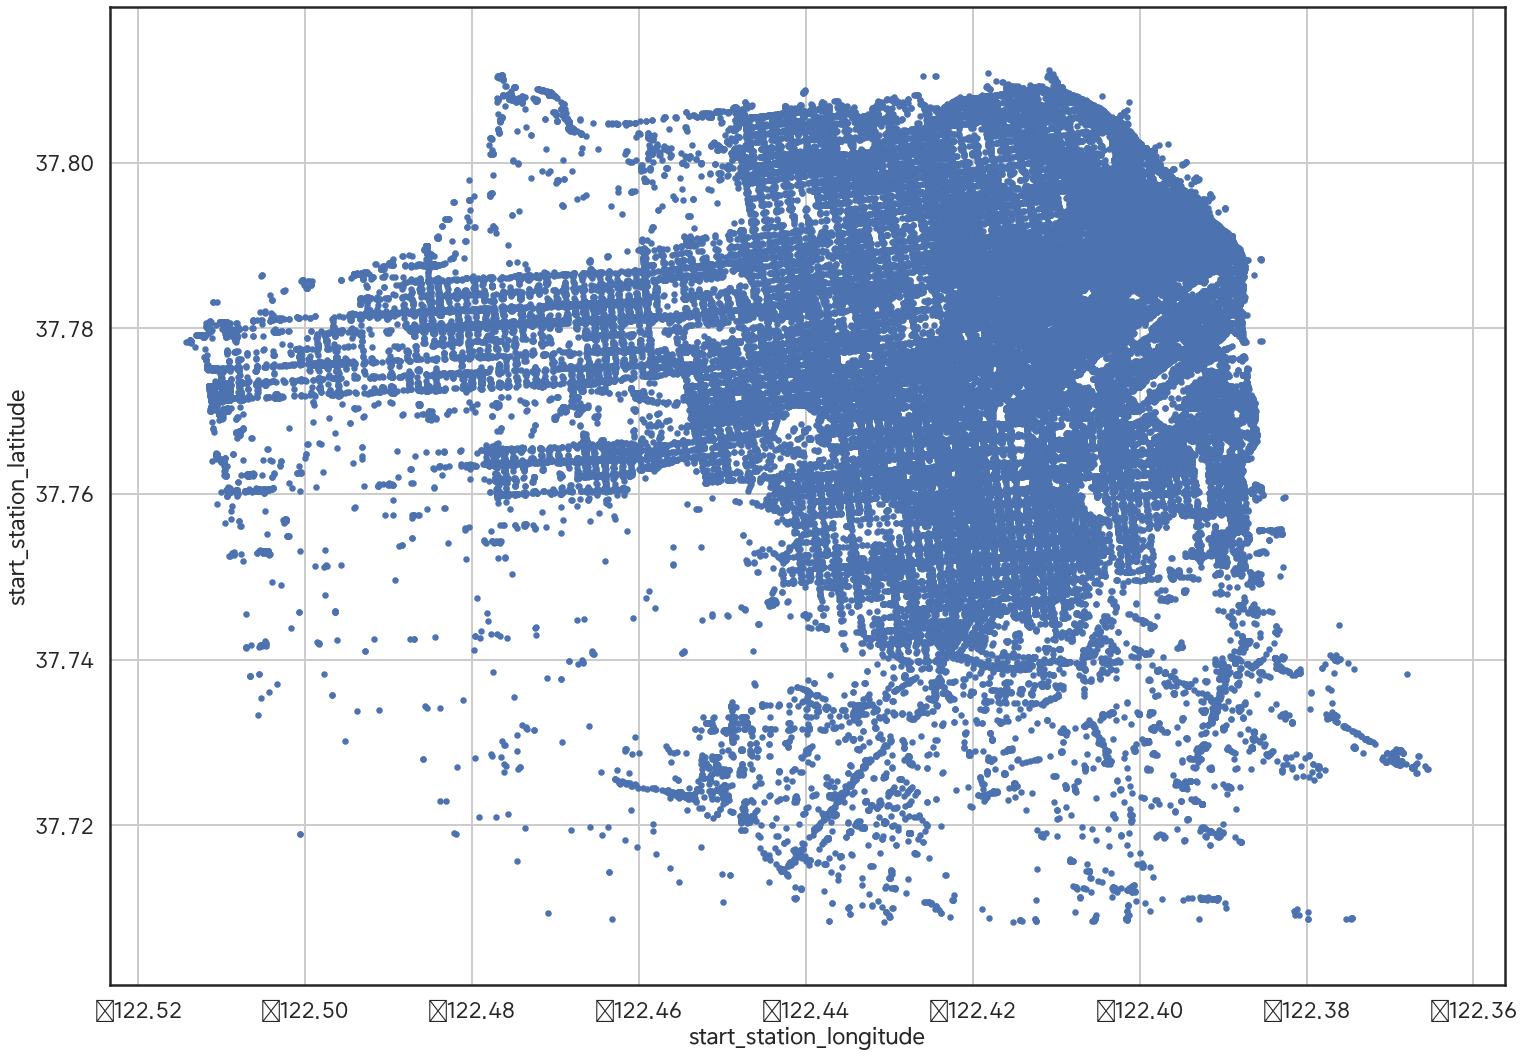

In [67]:
before_corona3 = sfdf[sfdf['start_time'].between("2020-01-01", "2020-03-16", inclusive=True)]
before_corona3.plot(kind = "scatter", x = "start_station_longitude", y = "start_station_latitude")
plt.show()

In [68]:
shelter_in_place["end_station_latitude"]

4337352    37.715400
4337353    37.790600
4337354    37.768100
4337355    37.778000
4337356    37.789400
             ...    
4848027    37.787604
4848028    37.787290
4848029    37.804016
4848030    37.789688
4848031    37.810528
Name: end_station_latitude, Length: 196949, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(-122.5143, -122.3484)

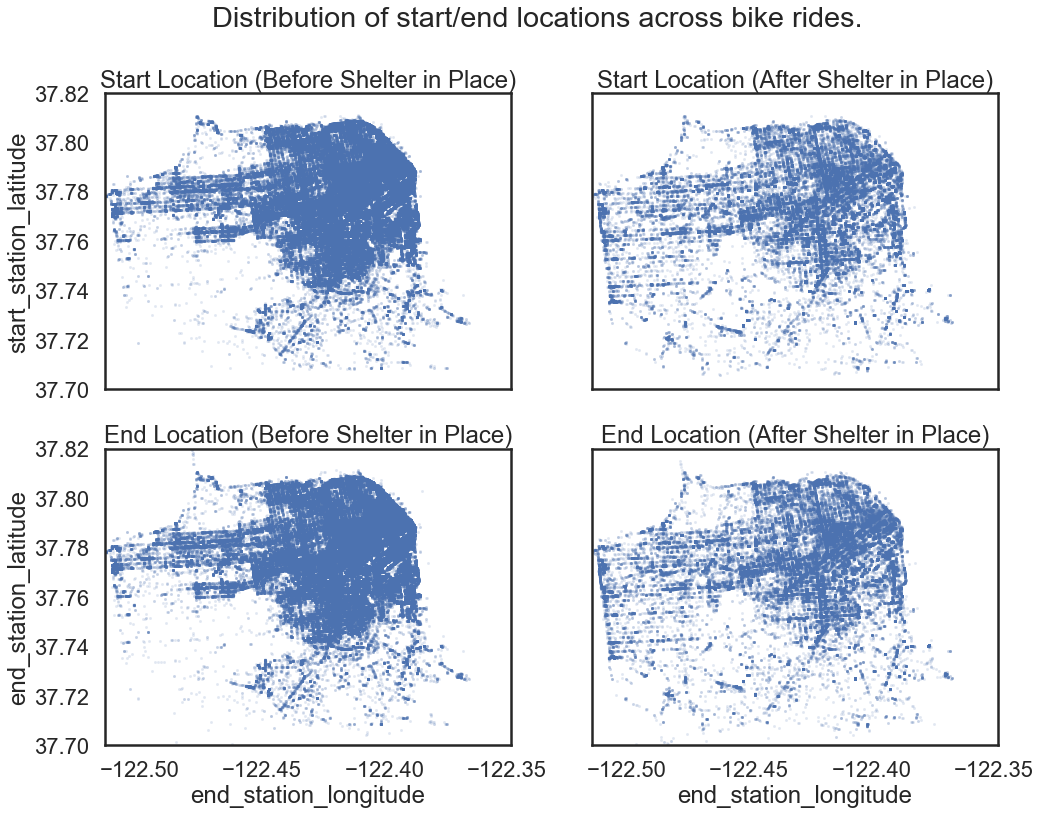

In [81]:
plt.rcParams.update({'font.size': 10})


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows = 2, figsize=(16, 12),  sharex=True, sharey=True)
alpha = 0.15 # make sure to include these as an argument
s = 1 # make sure to include this as an argument
# City boundaries
sns.set_style("white")
sns.set_context("poster")
#sns.set_style({'axes.grid': True, 'font.family': ['Binggrae Melona']})


city_long_border = (-122.5143, -122.3484)
city_lat_border = (37.70, 37.82)

before_corona3.plot(kind = "scatter", x = "start_station_longitude", y = "start_station_latitude", alpha=alpha, s=s, ax = ax1, title="Start Location (Before Shelter in Place)")
before_corona3.plot(kind = "scatter", x = "end_station_longitude", y = "end_station_latitude", alpha=alpha, s=s, ax = ax3, title="End Location (Before Shelter in Place)")



shelter_in_place.plot(kind = "scatter", x = "start_station_longitude", y = "start_station_latitude", alpha=alpha, s=s, ax = ax2, title="Start Location (After Shelter in Place)")
shelter_in_place.plot(kind = "scatter", x = "end_station_longitude", y = "end_station_latitude", alpha=alpha, s=s, ax = ax4, title="End Location (After Shelter in Place)")




fig.suptitle('Distribution of start/end locations across bike rides.')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [114]:
shelter_in_place.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
4337352,NaN,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,37.7286,-122.4921,NaN,NaN,37.7154,...,NaN,NaN,92634E825C7303CC,electric_bike,False,5,2020,2020.5,16,19
4337353,NaN,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,37.7919,-122.4174,492.0,Webster St at Clay St,37.7906,...,NaN,NaN,1FCDD14C62521CC1,electric_bike,False,5,2020,2020.5,20,18
4337354,NaN,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,37.7557,-122.4165,NaN,NaN,37.7681,...,NaN,NaN,3A5CEC684CA9FA18,electric_bike,False,5,2020,2020.5,14,19
4337355,NaN,2020-05-10 17:45:54,2020-05-10 18:29:29,12.0,Pier 1/2 at The Embarcadero,37.7964,-122.3946,NaN,NaN,37.7780,...,NaN,NaN,1FF95A9C2D1ED7F8,electric_bike,False,5,2020,2020.5,17,10
4337356,NaN,2020-05-11 08:45:24,2020-05-11 08:52:55,NaN,NaN,37.7856,-122.4134,NaN,NaN,37.7894,...,NaN,NaN,E0937CAFF4D56EC0,electric_bike,False,5,2020,2020.5,8,11


In [166]:
aaa = shelter_in_place[shelter_in_place['start_station_latitude'].between(37.7424, 37.7647, inclusive=True)]
aaa = aaa[aaa['start_station_longitude'].between(-122.5093, -122.4635, inclusive=True)]

In [167]:
aaa.to_csv('./A-Covid.csv', encoding='utf-8', index=False)

In [168]:
bbb = shelter_in_place[shelter_in_place['end_station_latitude'].between(37.7424, 37.7647, inclusive=True)]
bbb = bbb[bbb['end_station_longitude'].between(-122.5093, -122.4635, inclusive=True)]

In [169]:
bbb.to_csv('./B-Covid.csv', encoding='utf-8', index=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(-122.5143, -122.3484)

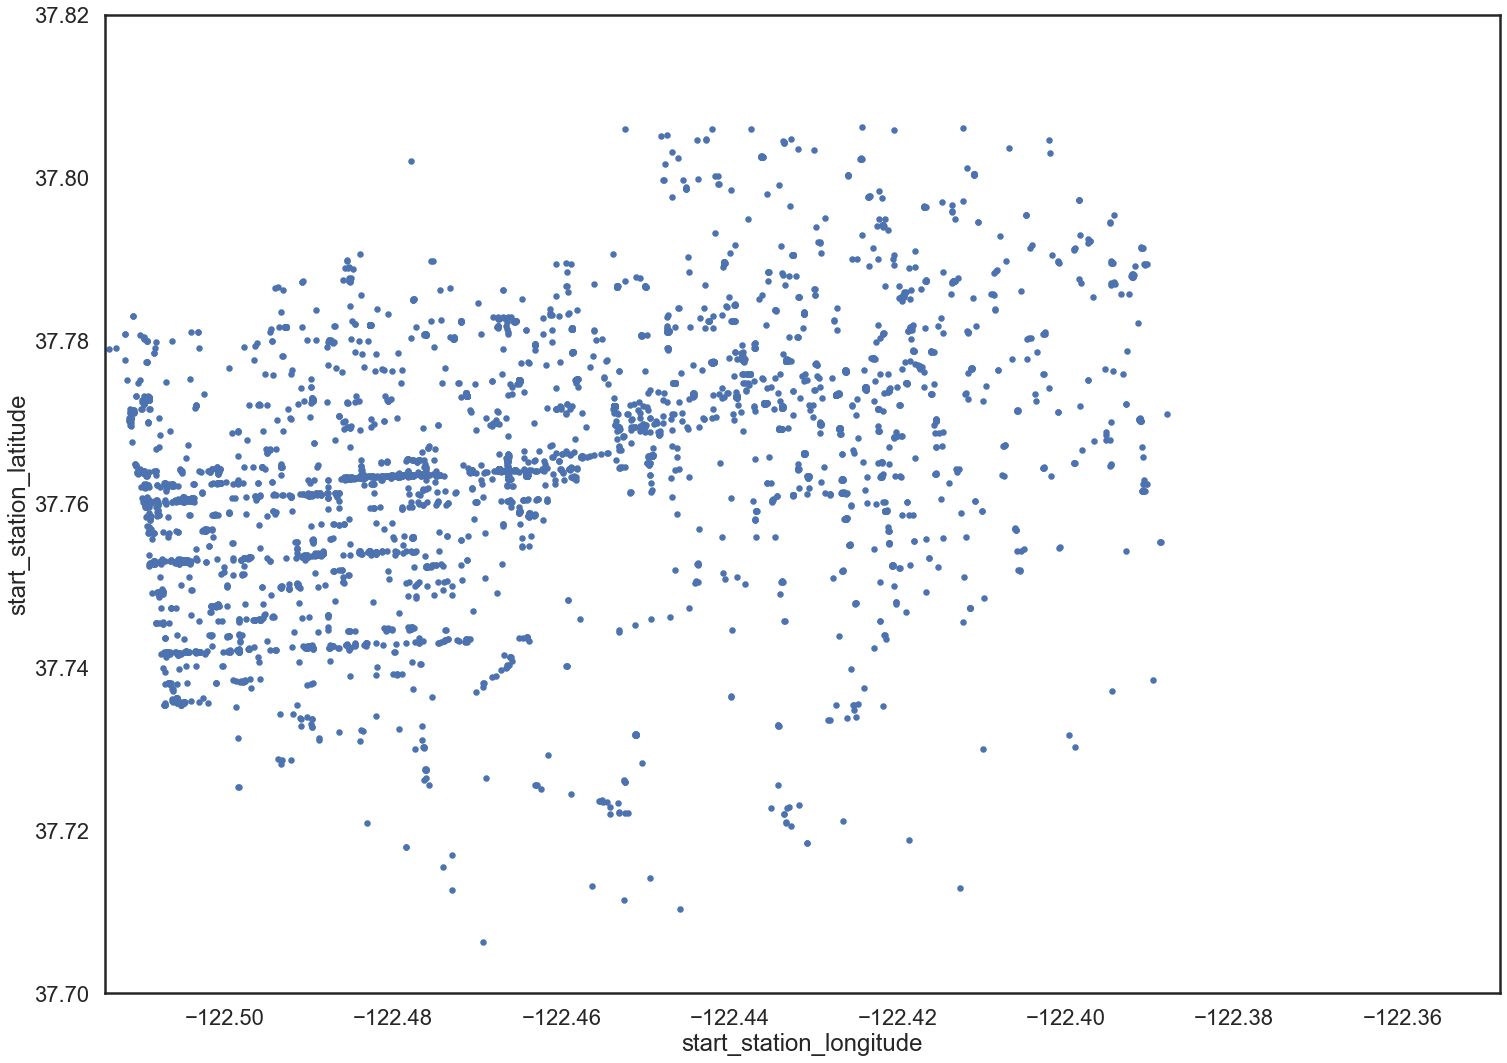

In [165]:
bbb.plot(kind = "scatter", x = "start_station_longitude", y = "start_station_latitude")
city_long_border = (-122.5143, -122.3484)
city_lat_border = (37.70, 37.82)


plt.ylim(city_lat_border)
plt.xlim(city_long_border)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(-122.5143, -122.3484)

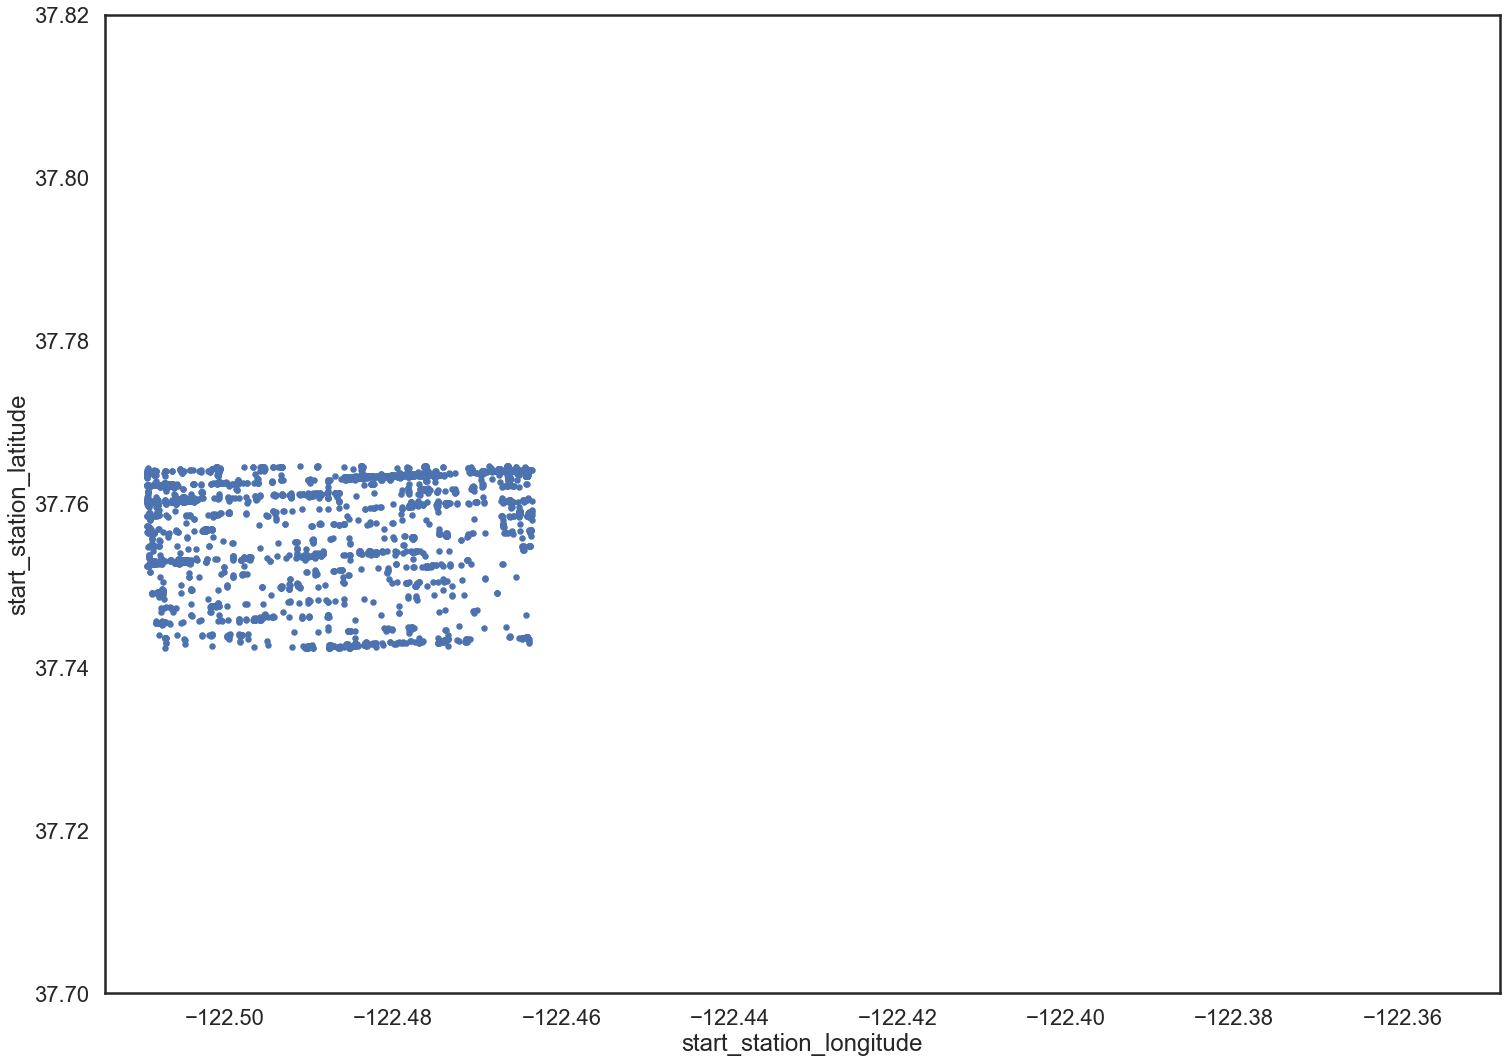

In [161]:
aaa.plot(kind = "scatter", x = "start_station_longitude", y = "start_station_latitude")
city_long_border = (-122.5143, -122.3484)
city_lat_border = (37.70, 37.82)


plt.ylim(city_lat_border)
plt.xlim(city_long_border)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(-122.5143, -122.45)

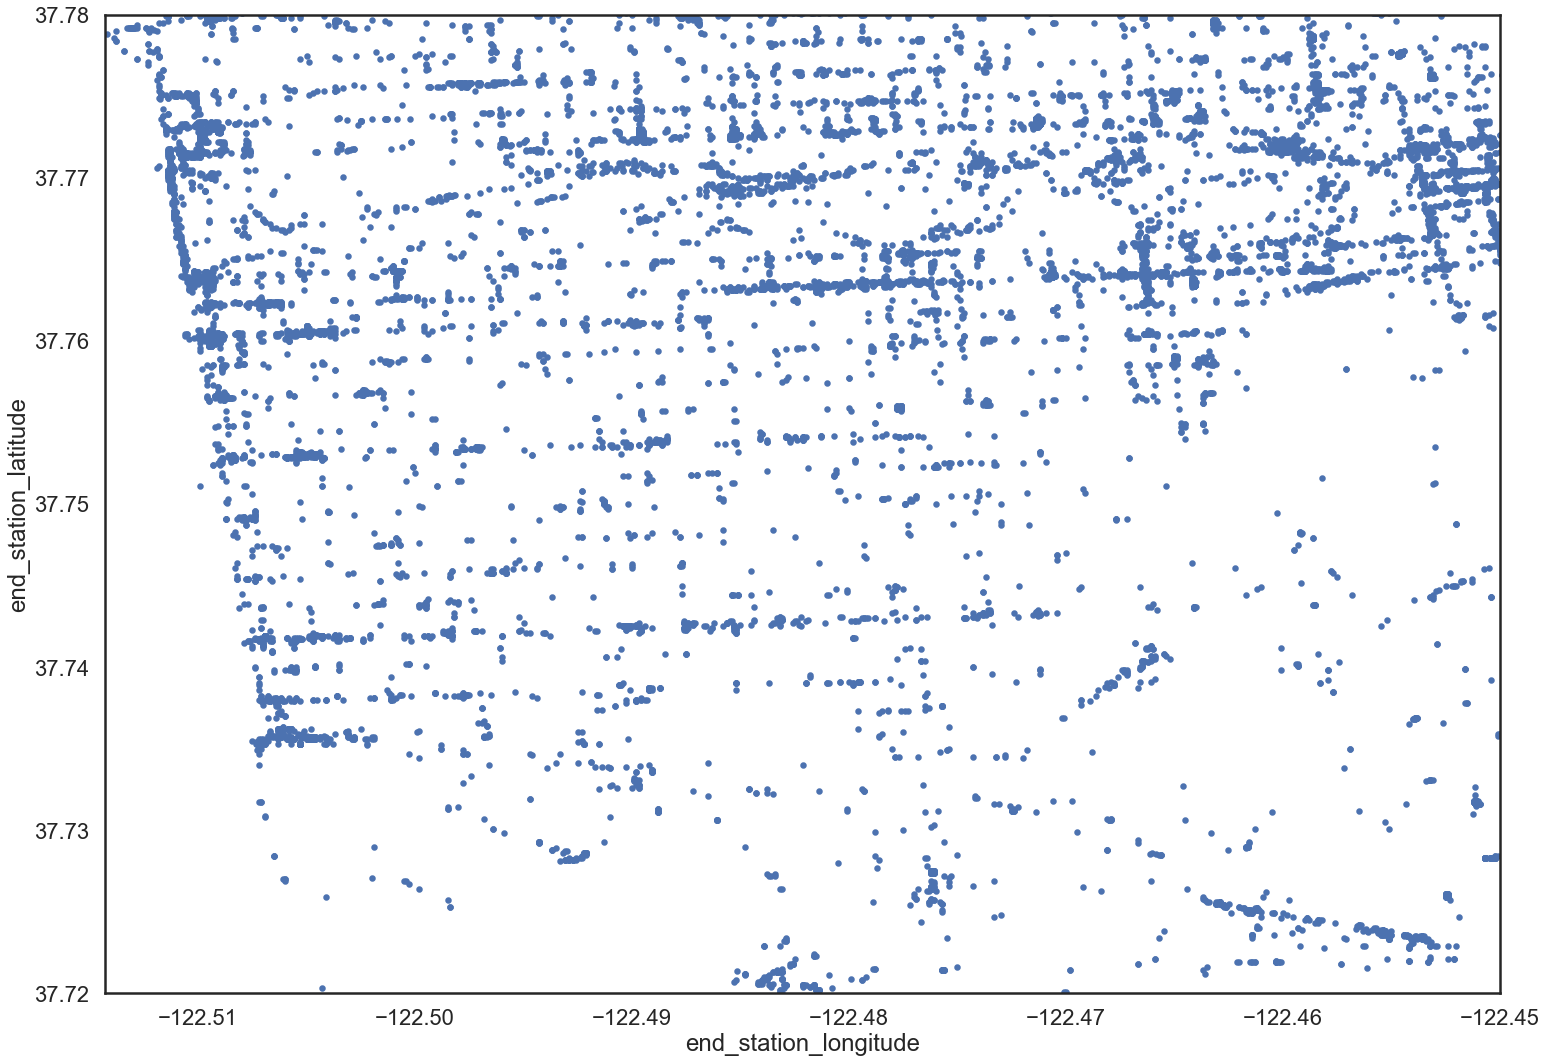

In [102]:
shelter_in_place.plot(kind = "scatter", x = "end_station_longitude", y = "end_station_latitude")
city_long_border = (-122.5143, -122.45)
city_lat_border = (37.72, 37.78)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [ ]:
bbb = shelter_in_place[shelter_in_place['end_station_longitude'].between(-122.50, -120.45, inclusive=False)]
bbb = shelter_in_place[shelter_in_place['start_station_latitude'].between(37.72, 37.78, inclusive=False)]

In [83]:
before_corona3.to_csv('./before_shelter_in_place-sf.csv', encoding='utf-8', index=False)


(-122.5143, -122.45)

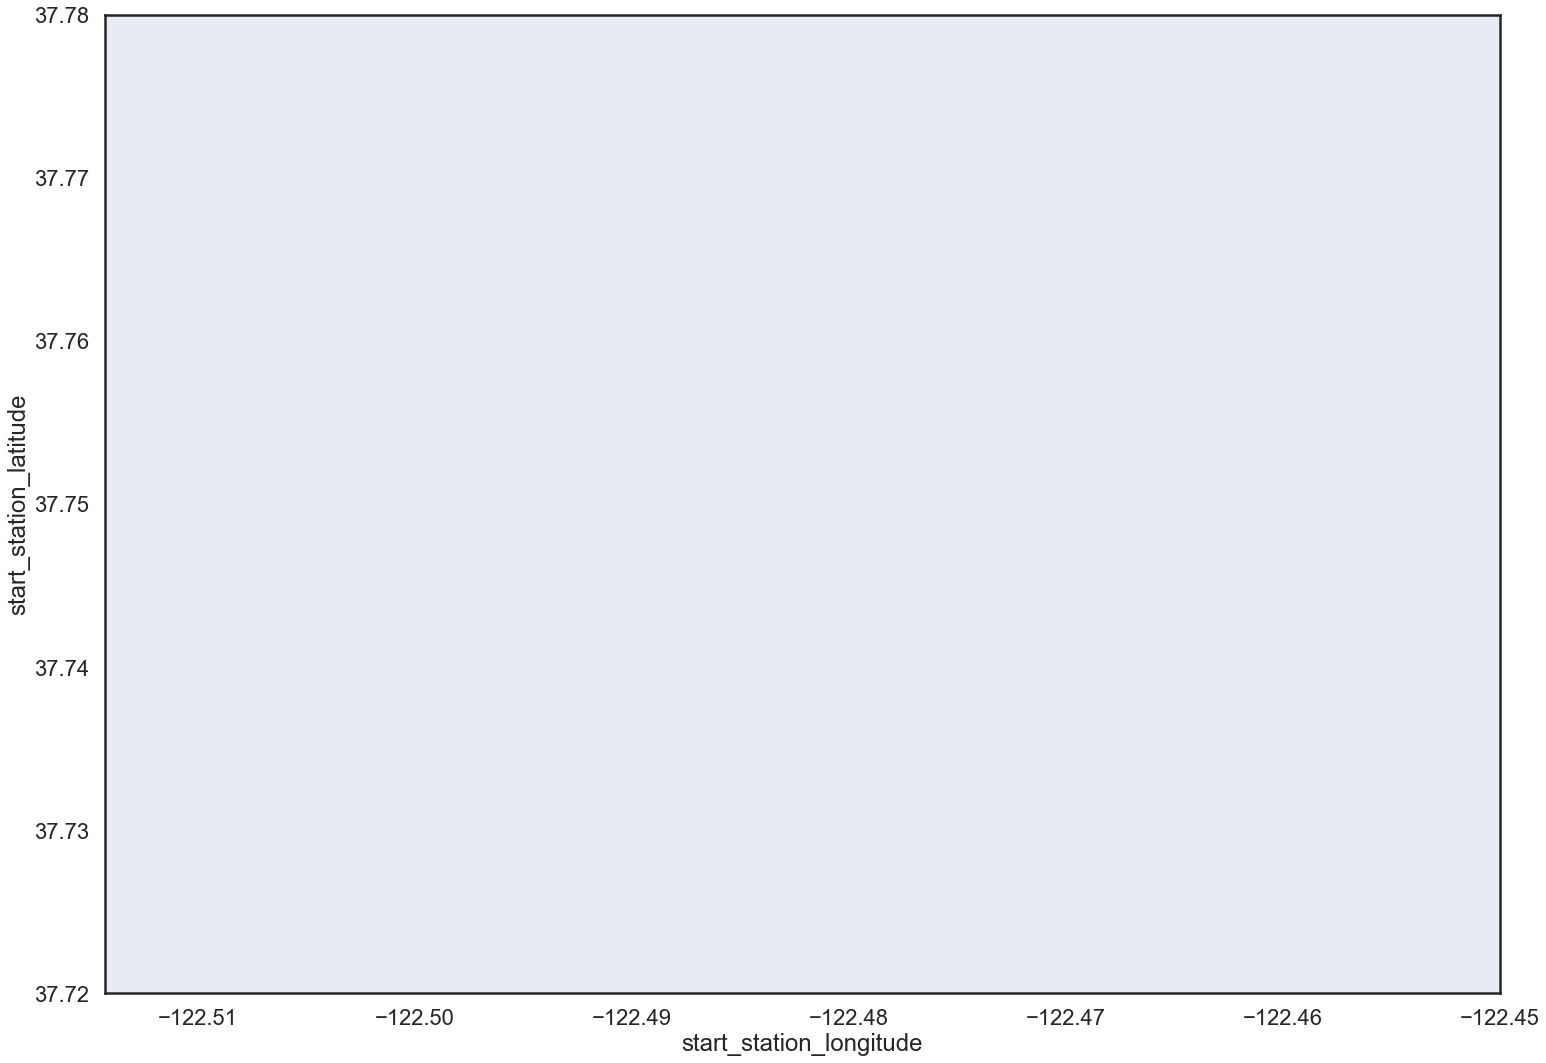

In [85]:
plt.rcParams.update({'font.size': 10})
alpha = 0.15 # make sure to include these as an argument
s = 1 # make sure to include this as an argument
# City boundaries
sns.set_style("white")
sns.set_context("poster")
#sns.set_style({'axes.grid': True, 'font.family': ['Binggrae Melona']})


city_long_border = (-122.5143, -122.45)
city_lat_border = (37.72, 37.78)


sns.kdeplot(before_corona3["start_station_longitude"], before_corona3["start_station_latitude"], shade=True)




fig.suptitle('Distribution of start/end locations across bike rides.')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [87]:
before_corona3.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
4848021,877.0,2020-03-05 10:17:10,2020-03-05 10:31:48,NaN,NaN,37.809177,-122.415263,NaN,NaN,37.808295,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,10,5
4848022,492.0,2020-03-08 10:13:01,2020-03-08 10:21:14,NaN,NaN,37.809197,-122.412139,12.0,Pier 1/2 at The Embarcadero,37.796389,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,10,8
4848023,1100.0,2020-03-13 13:15:28,2020-03-13 13:33:48,NaN,NaN,37.809579,-122.410255,NaN,NaN,37.805522,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,13,13
4848024,1115.0,2020-03-02 20:29:04,2020-03-02 20:47:39,NaN,NaN,37.809675,-122.409954,81.0,Berry St at 4th St,37.775880,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,20,2
4848025,476.0,2020-03-08 16:17:59,2020-03-08 16:25:56,NaN,NaN,37.809718,-122.409923,487.0,Powell St at Columbus Ave,37.800496,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,16,8


In [93]:
before_corona3.groupby('date').mean()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,month,year,start_hour,day
date,,,,,,,,,,,,
2020.1,789.088787,149.587260,37.777231,-122.411785,140.399968,37.776278,-122.407070,349364.023039,1.0,2020.0,13.513191,18.954337
2020.2,815.375729,153.899484,37.777495,-122.413701,145.983010,37.775534,-122.406103,393170.684650,2.0,2020.0,13.594542,15.097046
2020.3,821.567759,162.900744,37.777097,-122.413731,156.625389,37.775488,-122.406571,355282.793030,3.0,2020.0,13.563541,6.252966


In [94]:
shelter_in_place.groupby('date').mean()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,month,year,start_hour,day
date,,,,,,,,,,,,
2020.3,1188.059685,205.913017,37.776019,-122.421310,203.791107,37.774340,-122.416367,380825.146593,3.0,2020.0,14.370610,23.734434
2020.4,1058.245008,217.779540,37.774935,-122.423396,213.052745,37.774911,-122.423428,541440.804916,4.0,2020.0,14.297595,16.746312
2020.5,NaN,221.322791,37.774481,-122.427082,221.271170,37.774568,-122.427434,NaN,5.0,2020.0,14.343935,17.340166


In [96]:
shelter_in_place.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,rental_access_method,ride_id,rideable_type,is_equity,month,year,date,start_hour,day
4848027,1429.0,2020-03-28 16:52:56,2020-03-28 17:16:45,NaN,NaN,37.810162,-122.412339,NaN,NaN,37.787604,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,16,28
4848028,1416.0,2020-03-28 16:53:19,2020-03-28 17:16:55,NaN,NaN,37.810173,-122.412357,26.0,1st St at Folsom St,37.787290,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,16,28
4848029,804.0,2020-03-17 15:25:02,2020-03-17 15:38:27,NaN,NaN,37.810488,-122.476507,NaN,NaN,37.804016,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,15,17
4848030,2547.0,2020-03-17 15:23:09,2020-03-17 16:05:36,NaN,NaN,37.810513,-122.476495,512.0,Divisadero St at Clay St,37.789688,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,15,17
4848031,131.0,2020-03-17 15:16:10,2020-03-17 15:18:21,NaN,NaN,37.810528,-122.476450,NaN,NaN,37.810528,...,NaN,app,NaN,NaN,NaN,3,2020,2020.3,15,17


In [98]:
sfdf.groupby("date").mean()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,month,year,start_hour,day
date,,,,,,,,,,,,
2018.1,892.069701,70.737971,37.778119,-122.407563,66.951015,37.778669,-122.406177,2074.545243,1.0,2018.0,13.101388,17.412884
2018.10,844.219290,86.798465,37.777827,-122.406672,85.643887,37.778260,-122.405623,2431.949496,10.0,2018.0,13.310750,15.715625
2018.11,796.486047,91.618611,37.777684,-122.407094,89.844007,37.778182,-122.405734,2306.637908,11.0,2018.0,13.089310,13.604054
2018.12,801.847250,97.444461,37.777414,-122.407718,94.808524,37.777893,-122.406772,3302.046313,12.0,2018.0,13.299939,14.534988
2018.2,896.521683,74.212838,37.778151,-122.407394,70.970394,37.778679,-122.406014,2059.981956,2.0,2018.0,13.167652,13.799040
2018.3,895.142216,75.711068,37.778366,-122.407294,72.542565,37.778741,-122.406020,2043.875562,3.0,2018.0,13.412435,16.909730
2018.4,902.794215,74.833865,37.777992,-122.407554,71.869640,37.778443,-122.406288,2204.719930,4.0,2018.0,13.421461,16.519909
2018.5,874.023778,77.423001,37.777918,-122.407738,75.578036,37.778262,-122.406870,2589.022033,5.0,2018.0,13.536350,15.825737
2018.6,915.582154,80.050836,37.777984,-122.406995,78.731090,37.778379,-122.406171,2404.145075,6.0,2018.0,13.513683,15.751170


In [ ]:
shelter_in_place.between(-122.5143, -122.3484, inclusive=True)]